In [609]:
import pandas as pd
import numpy as np
from math import log2

In [610]:
dataSet=pd.read_excel("/Users/karanbudhaair/Downloads/Home_Loan.xlsx", header=None)   
dataSet=dataSet[6:].reset_index(drop=True)


In [611]:
dataSet.columns=dataSet.iloc[0]
dataSet=dataSet[1:].reset_index(drop=True)
dataSet

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,1,53,29.57,91700,123000,1.3413,2,< 25,10,385000,195000,50.65,360,2.75
1,2,6,90.76,83300,250000,3.0012,2,< 25,30,535000,505000,95,360,3.5
2,3,34,64.19,96500,64000,0.6632,2,< 25,43,375000,105000,28.55,180,2.5
3,4,51,34.58,124900,141000,1.1289,2,< 25,46,665000,345000,51.51,180,2.25
4,5,39,17.93,84600,109000,1.2884,1,< 25,30,405000,325000,80,180,2.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,37,40.28,80100,275000,3.4332,2,> 74,20,755000,505000,90,360,2.62
496,497,8,14.48,100000,79000,0.79,2,> 74,20,425000,315000,73.85,360,3
497,498,17,10.96,69300,187000,2.6984,2,> 74,10,325000,145000,43.75,180,2.87
498,499,26,33.82,79700,109000,1.3676,2,> 74,20,525000,385000,73.46,360,3.62


In [612]:
dataSet.isna().sum(axis=0)


0
Borrower ID Number                    0
Wide Area Location Code               0
% Minority in Local Area              0
Median Family Income in Local Area    0
Borrower Annual Income                0
Borrower Income Ratio                 0
First Time Buyer? (1=Yes, 2=No)       0
Age of Borrower                       0
Borrower Debt to Income Ratio         0
Appraised Value of Home               0
Amount Borrowed                       0
LTV Ratio                             0
Length of Mortgage in Months          0
Mortgage Interest Rate                0
dtype: int64

## Statistical Summary

In [613]:
dataSet.describe()

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
count,500,500,500.00,500,500,500.0000,500,500,500,500,500,500,500,500.00
unique,500,47,469.00,168,211,486.0000,2,7,18,95,66,355,4,42.00
top,1,6,10.96,83300,82000,0.7764,2,35 to 44,20,265000,245000,80,360,2.87
freq,1,80,3.00,26,10,2.0000,444,139,122,18,25,59,387,54.00


In [614]:
[~dataSet.columns.isin(["Age of Borrower"])]

[array([ True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True])]

In [615]:
dataSet.columns

Index(['Borrower ID Number', 'Wide Area Location Code',
       '% Minority in Local Area', 'Median Family Income in Local Area',
       'Borrower Annual Income', 'Borrower Income Ratio',
       'First Time Buyer? (1=Yes, 2=No)', 'Age of Borrower',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate'],
      dtype='object', name=0)

In [616]:
dataSetPartOne=dataSet[dataSet.columns[~dataSet.columns.isin(["Age of Borrower"])]].apply(lambda x: pd.to_numeric(x))
newDataSet=dataSetPartOne.join(dataSet["Age of Borrower"])[dataSet.columns]

In [617]:
newDataSet[:5]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,1,53,29.57,91700,123000,1.3413,2,< 25,10,385000,195000,50.65,360,2.75
1,2,6,90.76,83300,250000,3.0012,2,< 25,30,535000,505000,95.00,360,3.50
2,3,34,64.19,96500,64000,0.6632,2,< 25,43,375000,105000,28.55,180,2.50
3,4,51,34.58,124900,141000,1.1289,2,< 25,46,665000,345000,51.51,180,2.25
4,5,39,17.93,84600,109000,1.2884,1,< 25,30,405000,325000,80.00,180,2.87


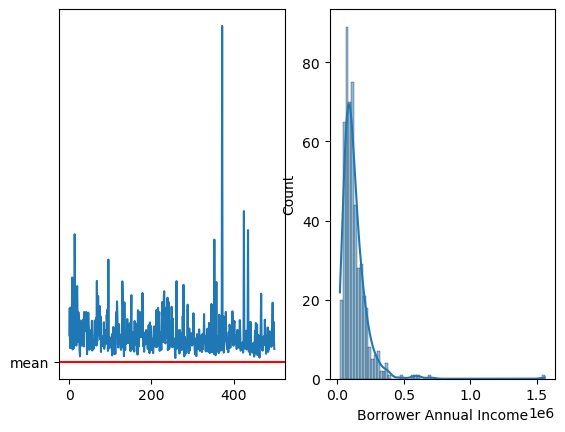

In [618]:
import matplotlib.pyplot as myplot
import seaborn as sns
fig,axes=myplot.subplots(1,2)
axes[0].plot(newDataSet["Borrower Annual Income"].values)
axes[0].axhline(y= 'mean', color='red')
#axes[1].hist(newDataSet["Borrower Annual Income"].values, bins='auto')
sns.histplot(newDataSet["Borrower Annual Income"],kde=True, bins='auto', ax=axes[1])
#newDataSet["Borrower Annual Income"].plot(kind='hist')
myplot.show()

<Axes: xlabel='Borrower Annual Income', ylabel='Count'>

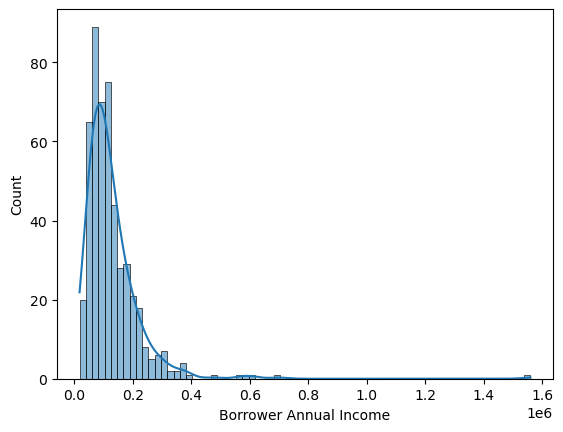

In [619]:
sns.histplot(newDataSet["Borrower Annual Income"],kde=True, bins='auto')

In [620]:
newDataSet[newDataSet["Borrower Annual Income"]==1560000]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
372,373,6,16.56,70700,1560000,22.0651,2,55 to 64,10,465000,325000,69.56,360,3.58


In [621]:
summary=newDataSet["Borrower Annual Income"].agg(['mean', 'median', 'std'])
summary

mean      127626.000000
median    105500.000000
std       105177.424885
Name: Borrower Annual Income, dtype: float64

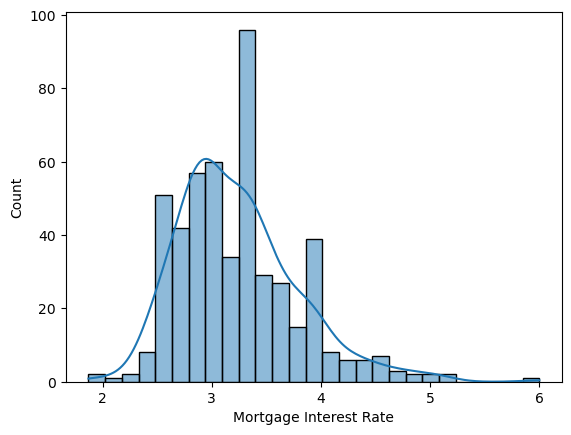

In [622]:
import seaborn as sns
sns.histplot(newDataSet['Mortgage Interest Rate'], bins='auto', kde=True)
myplot.show()

<Axes: xlabel='Borrower Annual Income', ylabel='Density'>

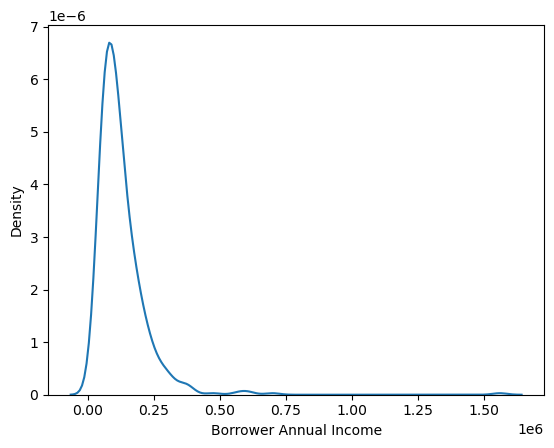

In [623]:
sns.kdeplot(newDataSet['Borrower Annual Income'], bw_adjust=0.9)

In [624]:
newDataSet[5:20]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
5,6,24,29.18,124900,255000,2.0416,2,< 25,20,905000,645000,71.44,360,2.86
6,7,8,81.63,100000,145000,1.4500,1,< 25,30,475000,395000,85.00,180,2.12
7,8,53,39.06,74600,392000,5.2547,2,< 25,20,265000,155000,60.00,360,2.99
8,9,36,98.09,96500,58000,0.6010,2,< 25,41,455000,185000,40.64,180,3.62
9,10,48,41.47,80000,170000,2.1250,2,< 25,20,535000,355000,65.60,180,2.37
10,11,34,40.18,96500,182000,1.8860,2,< 25,20,395000,305000,79.44,180,2.50
11,12,25,41.27,114000,64000,0.5614,2,< 25,44,465000,365000,80.00,360,4.62
12,13,6,84.75,127900,88000,0.6880,2,< 25,38,755000,385000,50.33,360,2.87
13,14,26,33.01,79700,593000,7.4404,2,< 25,20,545000,415000,75.00,360,4.75
14,15,6,34.80,127900,297000,2.3221,2,< 25,20,955000,765000,80.00,360,3.50


In [625]:
newDataSet["Borrower Annual Income"].agg(["mean","median"])

mean      127626.0
median    105500.0
Name: Borrower Annual Income, dtype: float64

In [626]:
value=newDataSet["Borrower Annual Income"].sort_values()[:499]
value.agg(["mean","median"])

mean      124755.511022
median    105000.000000
Name: Borrower Annual Income, dtype: float64

In [627]:
cat=pd.qcut(dataSet["Borrower Annual Income"],q=4)
print(cat)


0       (105500.0, 155250.0]
1      (155250.0, 1560000.0]
2       (17999.999, 69750.0]
3       (105500.0, 155250.0]
4       (105500.0, 155250.0]
               ...          
495    (155250.0, 1560000.0]
496      (69750.0, 105500.0]
497    (155250.0, 1560000.0]
498     (105500.0, 155250.0]
499     (17999.999, 69750.0]
Name: Borrower Annual Income, Length: 500, dtype: category
Categories (4, interval[float64, right]): [(17999.999, 69750.0] < (69750.0, 105500.0] < (105500.0, 155250.0] < (155250.0, 1560000.0]]


In [628]:
type(dataSet["Borrower Annual Income"])

pandas.core.series.Series

In [629]:
income_data=pd.concat([newDataSet["Borrower Annual Income"], cat], axis=1)
income_data.columns=["Income", "Category"]
income_data

,Income,Category
0,123000,"(105500.0, 155250.0]"
1,250000,"(155250.0, 1560000.0]"
2,64000,"(17999.999, 69750.0]"
3,141000,"(105500.0, 155250.0]"
4,109000,"(105500.0, 155250.0]"
...,...,...
495,275000,"(155250.0, 1560000.0]"
496,79000,"(69750.0, 105500.0]"
497,187000,"(155250.0, 1560000.0]"
498,109000,"(105500.0, 155250.0]"


In [630]:
grouped=income_data.groupby("Category")
grouped.groups.keys()

/var/folders/ck/bzg2z5s547d6mn01kk9k73280000gn/T/ipykernel_1065/1909285007.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped=income_data.groupby("Category")


dict_keys([Interval(17999.999, 69750.0, closed='right'), Interval(69750.0, 105500.0, closed='right'), Interval(105500.0, 155250.0, closed='right'), Interval(155250.0, 1560000.0, closed='right')])

In [631]:
keys=grouped.groups.keys()
keys=list(keys)
print("list of keys", keys)
import numpy as np
keys=np.array(keys)
print('arrays', keys)
keys=keysArray.reshape((2,2))
keys

list of keys [Interval(17999.999, 69750.0, closed='right'), Interval(69750.0, 105500.0, closed='right'), Interval(105500.0, 155250.0, closed='right'), Interval(155250.0, 1560000.0, closed='right')]
arrays [Interval(17999.999, 69750.0, closed='right')
 Interval(69750.0, 105500.0, closed='right')
 Interval(105500.0, 155250.0, closed='right')
 Interval(155250.0, 1560000.0, closed='right')]


NameError: name 'keysArray' is not defined

In [ ]:
grouped.groups

In [ ]:
grouped.get_group(pd.Interval(17999.999, 69750.0, closed='right'))

In [ ]:
keys=keys.reshape((2,2))
print(keys)

In [ ]:
fig1,axes=myplot.subplots(2,2, figsize=(8,8))
print("THe axes object has", axes)
for index, plots in enumerate(axes):
    print("outer array is ", index)
    for i,plotN in enumerate(plots):
        print("THe index of inner array is ", i)
        sns.histplot(grouped.get_group(keys[index,i]), ax=axes[index,i], label=f'group{index,i}', kde=True)
        myplot.legend()
myplot.show()

In [ ]:
second_group=grouped.get_group(keys[0,0])
second_group=grouped.get_group(keys[0,1])
third_group=grouped.get_group(keys[1,0])
fourth_group=grouped.get_group(keys[1,1])
print('the min of 1st group is', second_group.min(), 'the max is ', second_group.max(),'\n')
print('the min of 1st group is', second_group.min(), 'the max is ', second_group.max(),'\n')
print('the min of 1st group is', third_group.min(), 'the max is ', third_group.max(),'\n')
print('the min of 1st group is', fourth_group.min(), 'the max is ', fourth_group.max(),'\n')


In [ ]:
import math
#math.sqrt(second_group.var())

In [ ]:
pd.DataFrame(second_group).info()

In [ ]:
second_group
#second_group=second_group.astype(float)

In [ ]:
emperical_stats=second_group.describe()
emperical_stats

In [ ]:
#fourth_group=fourth_group.astype(float)
#fourth_group.describe()

In [ ]:
cv_second_group=second_group["Income"].std()/second_group["Income"].mean() *100
cv_second_group

In [ ]:
#23% of variation in group is not desriable <10% is okay to consisder homogenousness .

In [ ]:
sns.histplot(income_data["Income"],bins=100)
myplot.xlim(0,400000)

In [ ]:
dataSet[dataSet["Borrower Annual Income"]<80000]

In [ ]:
# 3:- Let the journey Begin 

In [ ]:
# let us use the regression model to see the best attributes
dataSet.columns


In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet.drop(["Borrower Annual Income", "Age of Borrower"],axis=1)
y=dataSet["Borrower Annual Income"]
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=None,
    random_state=42
)
model.fit(X_train, y_train)
plot_tree(model)
myplot.show()



In [ ]:
X_train[:2]

In [ ]:
from sklearn.tree import export_text
tree_rules= export_text(model, feature_names=X_train.columns)


In [ ]:
#X_train.groupby("Borrower Income Ratio").groups

In [ ]:
X_train

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet[["Borrower Income Ratio", "LTV Ratio"]]
y=dataSet["Borrower Annual Income"]
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=4,
    random_state=42
)

print(X_train)
model.fit(X_train, y_train)


In [ ]:
rules=export_text(model, feature_names=X_train.columns)
print(rules)


In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet[["Borrower Income Ratio", "LTV Ratio"]]
y=dataSet["Borrower Annual Income"]
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=1,
    random_state=42
)


model.fit(X_train, y_train)
plot_tree(model)
myplot.show()
rules=export_text(model, feature_names=X_train.columns)
print(rules)

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet.drop(["Borrower Annual Income","Age of Borrower"], axis=1)
y=dataSet["Borrower Annual Income"]

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.0001, random_state=42)
print(X_train.columns)

model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=3,
    random_state=42,
    min_samples_leaf=15
)


model.fit(X, y)
plot_tree(model)
myplot.show()
rules=export_text(model, feature_names=X_train.columns)
print(rules)


In [ ]:
target=dataSet["Borrower Annual Income"]
feature=dataSet["Borrower Income Ratio"]
left_tree=target[feature>3.88]
right_tree=target[(feature>2.79) & (feature<=3.88)]
print(right_tree[:5])
print("The length of right tree is ", len(right_tree))
print("The length of left tree is ", len(left_tree))
print("the mean", left_tree.mean())
print("the mean", right_tree.mean())
print("The left Variance is ",left_tree.var())
print("The right Variance is ",right_tree.var())
print("The parent variance is ", target.var())

In [ ]:
target=dataSet["Borrower Annual Income"]
feature=dataSet["Borrower Income Ratio"]
left_tree=target[(feature>1.49) & (feature<=1.91)]
right_tree=target[(feature>1.91) & (feature<=2.79)]
print(right_tree[:5])
print("The length of right tree is ", len(right_tree))
print("The length of left tree is ", len(left_tree))
print("the mean", left_tree.mean())
print("the mean", right_tree.mean())
print("The left Variance is ",left_tree.var())
print("The right Variance is ",right_tree.var())
print("The parent variance is ", target.var())

In [ ]:
v_parent=target.var()

In [ ]:
right_tree_var=(22/36)*right_tree.var()

right_tree_var

In [ ]:
left_tree_var=(14/36)* left_tree.var()
left_tree_var

In [ ]:
v_red_perc=( v_parent- (right_tree_var + left_tree_var) ) / v_parent
v_red_perc

In [ ]:
# The above number does not make sense without calculating the variance percentange reduction
# v_reduced= (v_parent - v_after)/ v_parent
v_parent=target.var()
v_after= (176/380 * right_tree.var() )+ (204/380 * left_tree.var())
v_reduced= (v_parent - v_after) / v_parent
v_reduced *100 

In [ ]:
v_parent=target.var()
v_after= (85/115 * right_tree.var() )+ (30/115 * left_tree.var())
v_reduced= (v_parent - v_after) / v_parent
v_reduced *100 

In [ ]:
new_data=dataSet[dataSet["Borrower Income Ratio" ]>  3.88][["Borrower Income Ratio","Borrower Annual Income"]]

In [ ]:
new_data

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet.drop(["Borrower Income Ratio","Age of Borrower","Borrower Annual Income"], axis=1)
y=dataSet["Borrower Income Ratio"]

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.0001, random_state=42)
print(X_train.columns)

model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=3,
    random_state=42,
    min_samples_leaf=15
)


model.fit(X, y)
plot_tree(model)
myplot.show()
rules=export_text(model, feature_names=X_train.columns)
print(rules)

In [ ]:
data_for_clustering=dataSet.drop(["Age of Borrower"], axis=1)
data_for_clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_for_clustering)
data_for_clustering['cluster']=kmeans.labels_
data_for_clustering

In [ ]:
clusters=data_for_clustering.groupby(by="cluster")
clusters.groups

In [ ]:
second_cluster=clusters.get_group(0)
second_cluster


In [ ]:
second_cluster=clusters.get_group(1)
second_cluster



In [ ]:
third_cluster=clusters.get_group(2)
print(third_cluster.shape)
third_cluster



In [ ]:
kmeans.cluster_centers_

In [ ]:
data_for_clustering.groupby(by="cluster").mean()

In [ ]:
from sklearn.cluster import KMeans
new_data_for_cluster=dataSet.drop(["Borrower ID Number","Age of Borrower"], axis=1)
new_kmeans=KMeans( random_state=42)
new_kmeans.fit(new_data_for_cluster)
new_kmeans.cluster_centers_

new_data_for_cluster["clusters"]=new_kmeans.labels_
new_kmeans.n_clusters

In [ ]:
new_data_for_cluster.groupby("clusters").mean()

In [ ]:
second=new_data_for_cluster.groupby(by='clusters').get_group(0)
second

In [ ]:
import seaborn as sns
sns.lineplot(second["Borrower Income Ratio"].sort_values())

In [ ]:
a=second["Borrower Income Ratio"].sort_values().reset_index(drop=True)
a

In [ ]:
sns.histplot(second["Borrower Income Ratio"].sort_values().reset_index(drop=True), kde=True)

In [ ]:
sns.histplot(dataSet["Borrower Income Ratio"].sort_values().reset_index(drop=True) )

In [ ]:
sns.histplot(new_data_for_cluster.groupby(by='clusters').get_group(1)["Borrower Income Ratio"].reset_index(drop=True),kde= True)

In [ ]:
for i in range(10):
    print(i)

In [ ]:
new_data_for_cluster

In [ ]:
data_for_clustering.columns

In [644]:
# NOw let us use elbow(inertia) to find the best value of K
from sklearn.cluster import KMeans
inertia1=[]
K =range(1,16)
data1=data_for_clustering.drop(["Borrower ID Number","cluster"], axis=1)
for k in K:
    kmean=KMeans(n_clusters=k, random_state=42)
    kmean.fit(data1)
    inertia1.append(kmean.inertia_)
print(inertia1)

[47312717685094.91, 20896510790715.75, 14788264678769.586, 11619334556573.71, 9923323381875.764, 7907111676019.516, 6903265895777.26, 6196289702447.646, 5844405088551.535, 5474593972506.455, 4663863256292.891, 4372300641685.2666, 4052695682359.914, 3820762120173.2993, 3661640118556.379]


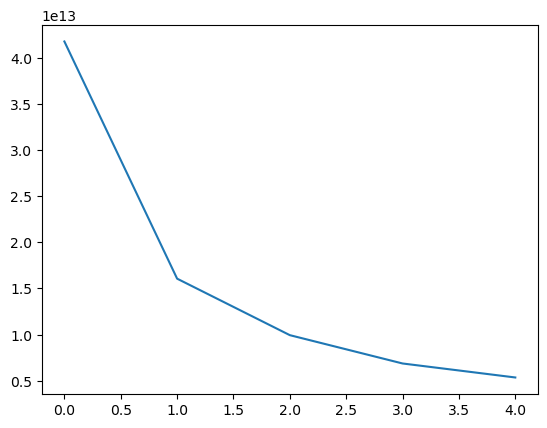

In [645]:
myplot.plot(pd.Series(inertia))

In [646]:
pd.Series(inertia)

0    4.179263e+13
1    1.606114e+13
2    9.931559e+12
3    6.859196e+12
4    5.341028e+12
dtype: float64

In [1244]:
# NOw let us use elbow(inertia) to find the best value of K
from sklearn.cluster import KMeans
inertia=[]

K =range(1,3)

for k in K:
    kmean=KMeans(n_clusters=k, random_state=42)
    kmean.fit(data1)
    inertia.append(kmean.inertia_)
print(inertia)
clusters=kmean.labels_

print(len(clusters))
k_five_means_data_set=data1
k_five_means_data_set["Cluster"]=clusters
k_five_means_data_set

[47312717686133.72, 20896510791397.273]
500


,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,0
1,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5,1
2,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,0
3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25,1
4,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62,1
496,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3,0
497,17,10.96,69300,187000,2.6984,2,10,325000,145000,43.75,180,2.87,0
498,26,33.82,79700,109000,1.3676,2,20,525000,385000,73.46,360,3.62,1


In [1245]:
# Now the task comes of cross checking these clusters(k=5) with the help of scatterplot where we will use PCA

In [1246]:
k_five_means_data_set["Cluster"].value_counts()

Cluster
0    353
1    147
Name: count, dtype: int64

In [1247]:
k=k_five_means_data_set
k[k["Cluster"]==1]

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
1,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5,1
3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25,1
5,24,29.18,124900,255000,2.0416,2,20,905000,645000,71.44,360,2.86,1
9,48,41.47,80000,170000,2.125,2,20,535000,355000,65.6,180,2.37,1
12,6,84.75,127900,88000,0.688,2,38,755000,385000,50.33,360,2.87,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6,17.59,92700,97000,1.0464,2,44,765000,605000,79,360,2.69,1
492,6,44.8,102700,70000,0.6816,2,45,655000,145000,22.41,120,2.5,1
494,8,21.49,100000,172000,1.72,2,20,535000,375000,70,360,3.5,1
495,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62,1


In [1248]:
len(dataSet.columns)

14

In [1249]:
len(data1.columns)

13

In [1250]:
kmean.cluster_centers_

array([[2.76543909e+01, 2.53764306e+01, 8.18702550e+04, 1.02490085e+05,
        1.28071926e+00, 1.85835694e+00, 3.03257790e+01, 3.05368272e+05,
        2.18144476e+05, 7.34658357e+01, 3.18696884e+02, 3.27566572e+00,
        1.11048159e+00],
       [2.02108844e+01, 3.53819048e+01, 9.35367347e+04, 1.87986395e+05,
        2.12098435e+00, 1.95918367e+00, 3.02244898e+01, 7.45476190e+05,
        4.49217687e+05, 6.40409524e+01, 3.33061224e+02, 3.13782313e+00,
        2.96598639e+00]])

In [1251]:
len(data1.columns)

13

In [1252]:
k["Cluster"].value_counts()

Cluster
0    353
1    147
Name: count, dtype: int64

In [1253]:
k_group=k.groupby(by="Cluster")
print(k_group.groups.keys())

dict_keys([0, 1])


In [1254]:
second_cluster=k_group.get_group(0)
second_cluster

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,0
2,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,0
4,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87,0
6,8,81.63,100000,145000,1.45,1,30,475000,395000,85,180,2.12,0
7,53,39.06,74600,392000,5.2547,2,20,265000,155000,60,360,2.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,37,25.24,94100,95000,1.0096,1,30,405000,345000,85.91,360,2.62,0
493,4,17.66,77800,104000,1.3368,2,10,475000,205000,43.28,180,2.75,0
496,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3,0
497,17,10.96,69300,187000,2.6984,2,10,325000,145000,43.75,180,2.87,0


In [1255]:
second_cluster=k_group.get_group(1)
print(second_cluster.shape)
second_cluster

(147, 13)


,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
1,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5,1
3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25,1
5,24,29.18,124900,255000,2.0416,2,20,905000,645000,71.44,360,2.86,1
9,48,41.47,80000,170000,2.125,2,20,535000,355000,65.6,180,2.37,1
12,6,84.75,127900,88000,0.688,2,38,755000,385000,50.33,360,2.87,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6,17.59,92700,97000,1.0464,2,44,765000,605000,79,360,2.69,1
492,6,44.8,102700,70000,0.6816,2,45,655000,145000,22.41,120,2.5,1
494,8,21.49,100000,172000,1.72,2,20,535000,375000,70,360,3.5,1
495,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62,1


In [1256]:
third_cluster=k_group.get_group(2)
print(third_cluster.shape)
third_cluster

KeyError: 2

In [686]:
fourth_cluster=k_group.get_group(3)
print(fourth_cluster.shape)
fourth_cluster

(11, 13)


,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
114,17,12.95,89100,231000,2.5926,2,20,1465000,505000,34.95,360,2.99,3
131,6,24.95,97800,222000,2.2699,1,20,1105000,715000,64.81,360,3,3
231,6,32.62,127900,328000,2.5645,2,20,1915000,715000,37.38,240,2.5,3
235,47,7.21,80700,251000,3.1103,2,10,1425000,405000,28.34,180,2.62,3
261,39,17.14,84600,375000,4.4326,2,37,1505000,515000,34.02,360,3,3
334,37,8.04,80100,124000,1.5481,2,38,1605000,515000,31.9,360,2.5,3
369,6,25.17,127900,117000,0.9148,2,38,1215000,395000,32.23,240,3,3
381,20,11.96,85900,232000,2.7008,2,36,1155000,515000,44.38,240,3.5,3
410,6,63.85,83300,126000,1.5126,1,44,1265000,655000,57.11,360,2.99,3
457,6,28.31,83300,174000,2.0888,2,44,1445000,725000,50.45,360,3.87,3


In [687]:
fifth_cluster=k_group.get_group(3)
print(fifth_cluster.shape)
fifth_cluster

(11, 13)


,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
114,17,12.95,89100,231000,2.5926,2,20,1465000,505000,34.95,360,2.99,3
131,6,24.95,97800,222000,2.2699,1,20,1105000,715000,64.81,360,3,3
231,6,32.62,127900,328000,2.5645,2,20,1915000,715000,37.38,240,2.5,3
235,47,7.21,80700,251000,3.1103,2,10,1425000,405000,28.34,180,2.62,3
261,39,17.14,84600,375000,4.4326,2,37,1505000,515000,34.02,360,3,3
334,37,8.04,80100,124000,1.5481,2,38,1605000,515000,31.9,360,2.5,3
369,6,25.17,127900,117000,0.9148,2,38,1215000,395000,32.23,240,3,3
381,20,11.96,85900,232000,2.7008,2,36,1155000,515000,44.38,240,3.5,3
410,6,63.85,83300,126000,1.5126,1,44,1265000,655000,57.11,360,2.99,3
457,6,28.31,83300,174000,2.0888,2,44,1445000,725000,50.45,360,3.87,3


In [1257]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_for_pca=k_five_means_data_set.drop("Cluster", axis=1)
data_for_pca["Borrower Annual Income"]=dataSet["Borrower Annual Income"]
scalerd_data=scaler.fit_transform(data_for_pca)


In [1258]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
scalered_data_pca=pca.fit_transform(scalerd_data)


In [1259]:

pca.components_

array([[-0.13885604,  0.13698082,  0.22332004,  0.45619587,  0.39996485,
         0.14881843, -0.14651136,  0.49085175,  0.45569953, -0.19083105,
        -0.03262311, -0.11960808],
       [ 0.16483454, -0.26100335, -0.36634934,  0.42389561,  0.49540449,
        -0.04552549, -0.38573437, -0.3076795 , -0.23765883,  0.16713647,
        -0.0734523 ,  0.10020022]])

In [1260]:
pca.components_

array([[-0.13885604,  0.13698082,  0.22332004,  0.45619587,  0.39996485,
         0.14881843, -0.14651136,  0.49085175,  0.45569953, -0.19083105,
        -0.03262311, -0.11960808],
       [ 0.16483454, -0.26100335, -0.36634934,  0.42389561,  0.49540449,
        -0.04552549, -0.38573437, -0.3076795 , -0.23765883,  0.16713647,
        -0.0734523 ,  0.10020022]])

In [1261]:
pca.explained_variance_ratio_

array([0.22949195, 0.15908608])

In [1262]:
scalered_data_pca.shape

(500, 2)

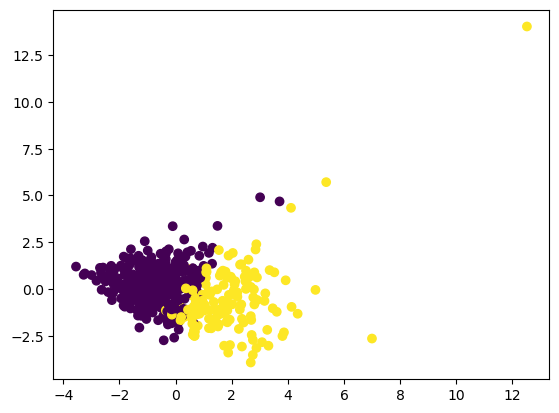

In [1263]:
myplot.scatter(scalered_data_pca[:,0], scalered_data_pca[:,1], c=kmean.labels_)

In [674]:

k_second_cluster=second_cluster.drop("Cluster",axis=1).reset_index(drop=True)
k_second_cluster

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75
1,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87
2,36,98.09,96500,58000,0.601,2,41,455000,185000,40.64,180,3.62
3,34,40.18,96500,182000,1.886,2,20,395000,305000,79.44,180,2.5
4,25,41.27,114000,64000,0.5614,2,44,465000,365000,80,360,4.62
...,...,...,...,...,...,...,...,...,...,...,...,...
159,22,31.96,54400,62000,1.1397,2,45,355000,285000,79.63,360,2.75
160,37,25.24,94100,95000,1.0096,1,30,405000,345000,85.91,360,2.62
161,4,17.66,77800,104000,1.3368,2,10,475000,205000,43.28,180,2.75
162,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3


<Axes: ylabel='Frequency'>

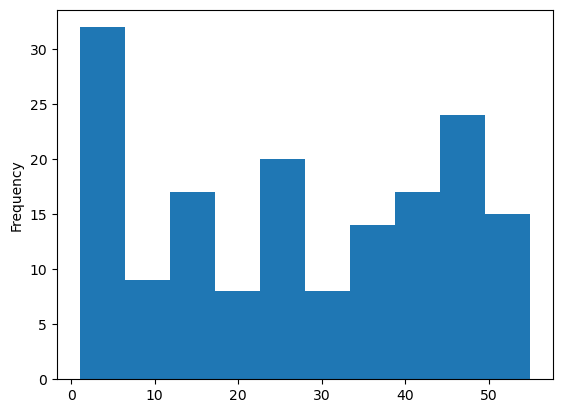

In [680]:
k_second_cluster["Wide Area Location Code"].plot(kind="hist")

<Axes: ylabel='Frequency'>

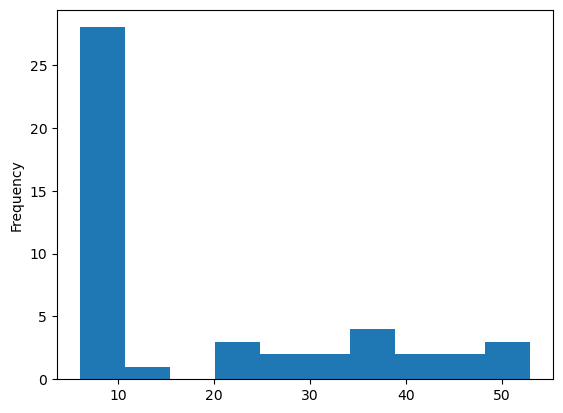

In [696]:
k_second_cluster=second_cluster.drop("Cluster",axis=1).reset_index(drop=True)
k_second_cluster["Wide Area Location Code"].plot(kind='hist')

In [695]:
k_second_cluster.columns

Index(['Wide Area Location Code', '% Minority in Local Area',
       'Median Family Income in Local Area', 'Borrower Annual Income',
       'Borrower Income Ratio', 'First Time Buyer? (1=Yes, 2=No)',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate'],
      dtype='object', name=0)

In [706]:
k_third_cluster=third_cluster.drop("Cluster",axis=1).reset_index(drop=True)
#k_third_cluster["Wide Area Location Code"].plot(kind='hist')
axes[0,0].plot(k_third_cluster["Wide Area Location Code"])
myplot.show()

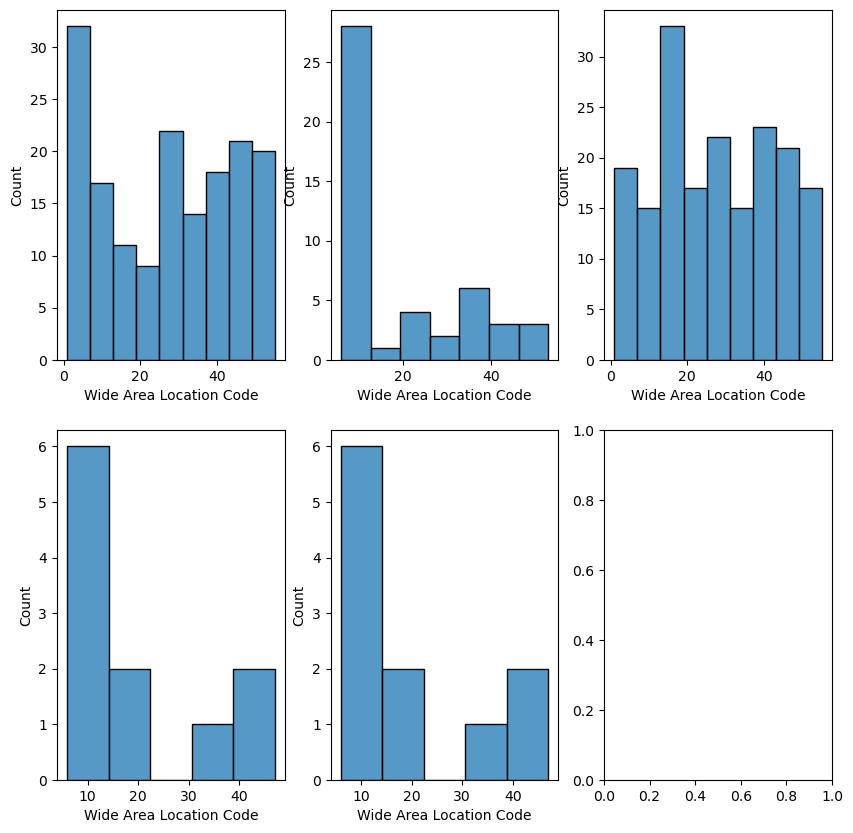

In [721]:
import seaborn as sns
fig, axes=myplot.subplots(2,3, figsize=(10,10))

k_third_cluster=third_cluster.drop("Cluster",axis=1).reset_index(drop=True)
k_fourth_cluster=fourth_cluster.drop("Cluster",axis=1).reset_index(drop=True)
k_fifth_cluster=fifth_cluster.drop("Cluster",axis=1).reset_index(drop=True)

sns.histplot(data=k_second_cluster["Wide Area Location Code"], ax=axes[0,0])

sns.histplot(data=k_second_cluster["Wide Area Location Code"], ax=axes[0,1])
sns.histplot(data=k_third_cluster["Wide Area Location Code"], ax=axes[0,2])
sns.histplot(data=k_fourth_cluster["Wide Area Location Code"], ax=axes[1,0])
sns.histplot(data=k_fifth_cluster["Wide Area Location Code"], ax=axes[1,1])

myplot.show()

In [730]:
import seaborn as sns
sns.histplot(data=k_second_cluster["Wide Area Location Code"], ax=axes[0,0])

<Axes: xlabel='Wide Area Location Code', ylabel='Count'>

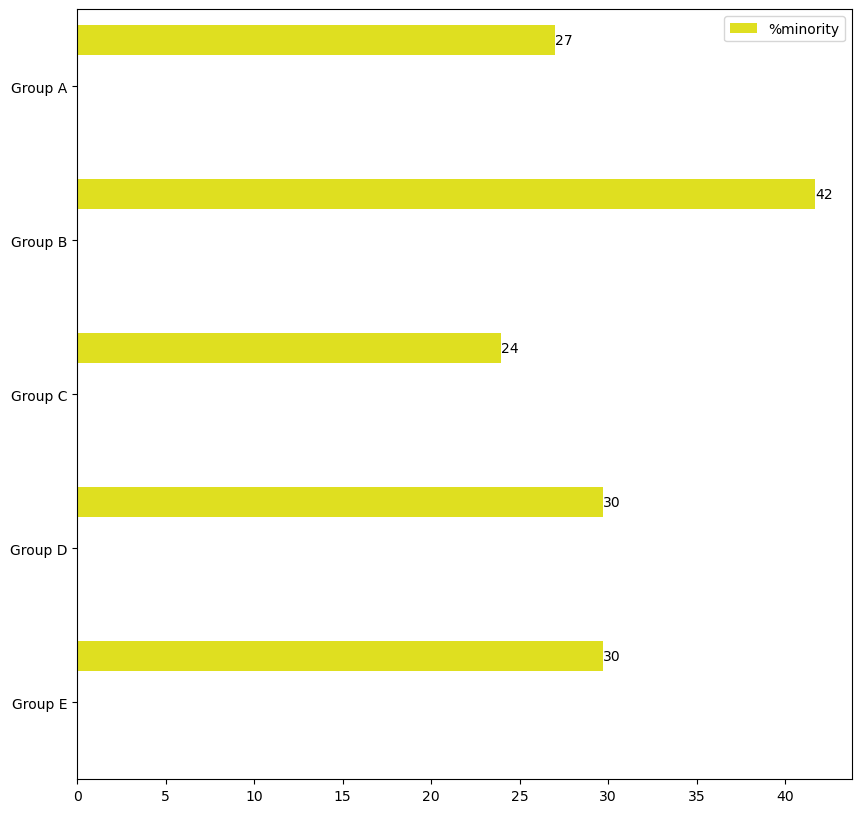

In [796]:
import seaborn as sns
fig, axes=myplot.subplots(1,1, figsize=(10,10))

k_third_cluster=third_cluster.drop("Cluster",axis=1).reset_index(drop=True)
k_fourth_cluster=fourth_cluster.drop("Cluster",axis=1).reset_index(drop=True)
k_fifth_cluster=fifth_cluster.drop("Cluster",axis=1).reset_index(drop=True)


ax=sns.barplot(data=means, orient='h', label="%minority", color='yellow',height=0.2)
axes.legend(loc='best')

for bar in ax.patches:
    ax.text(
        bar.get_width(),
        bar.get_y() + bar.get_height()/2,
        f"{bar.get_width():.0f}",
        ha='left', va='center',
        
    )


myplot.show()

% minority_mean                     27.021951
median_family_income_mean        84364.024390
borrower_annual_income          118506.097561
borrower_income_ratio                1.448484
dti                                 30.597561
appraised_home_value            383475.609756
LTV_ratio                           74.654939
length_of_mortgage_in_months       321.951220
mortgage_interest_rate               3.196280
dtype: float64


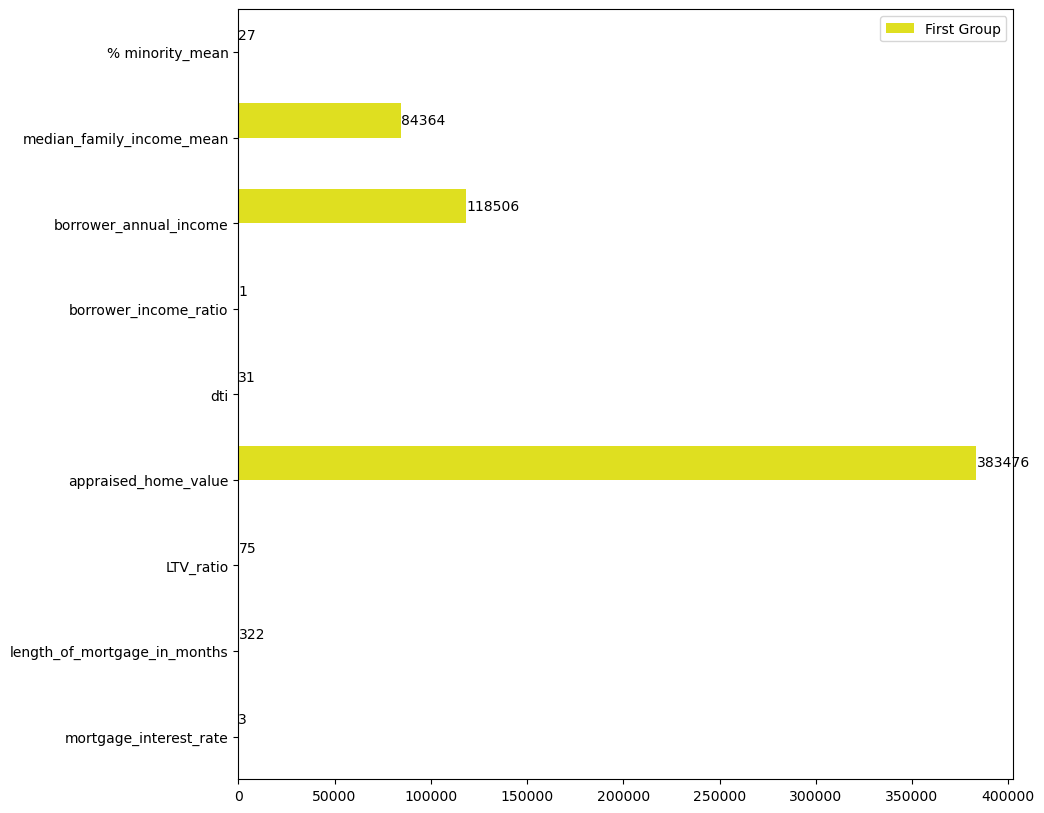

In [808]:
import seaborn as sns
fig, axes=myplot.subplots( figsize=(10,10))

minority_mean= k_first_cluster["% Minority in Local Area"].mean()
median_family_income_mean= k_first_cluster["Median Family Income in Local Area"].mean()
borrower_annual_income= k_first_cluster["Borrower Annual Income"].mean()
borrower_income_ratio= k_first_cluster["Borrower Income Ratio"].mean()
dti=  k_first_cluster["Borrower Debt to Income Ratio"].mean()
appraised_home_value=k_first_cluster["Appraised Value of Home"].mean()
LTV_ratio= k_first_cluster["LTV Ratio"].mean()
length_of_mortgage_in_months= k_first_cluster["Length of Mortgage in Months"].mean()
mortgage_interest_rate= k_first_cluster["Mortgage Interest Rate"].mean()
means=[minority_mean, median_family_income_mean,borrower_annual_income,borrower_income_ratio,dti, appraised_home_value, LTV_ratio,length_of_mortgage_in_months, mortgage_interest_rate]
all_means_series=pd.Series(means)
all_means_series.index=["% minority_mean", "median_family_income_mean","borrower_annual_income","borrower_income_ratio","dti", "appraised_home_value", "LTV_ratio","length_of_mortgage_in_months", "mortgage_interest_rate"]
print(all_means_series)

ax=sns.barplot(data=all_means_series, orient='h', label="First Group", color='yellow',height=0.4, ax=axes)
axes.legend(loc='best')

for bar in ax.patches:
    ax.text(
        bar.get_width(),
        bar.get_y() + bar.get_height()/2,
        f"{bar.get_width():.0f}",
        ha='left', va='center',
        
    )


myplot.show()



% minority_mean                     41.705957
median_family_income_mean        98491.489362
borrower_annual_income          173382.978723
borrower_income_ratio                1.836796
dti                                 29.404255
appraised_home_value            845851.063830
LTV_ratio                           60.898723
length_of_mortgage_in_months       342.127660
mortgage_interest_rate               3.147234
dtype: float64


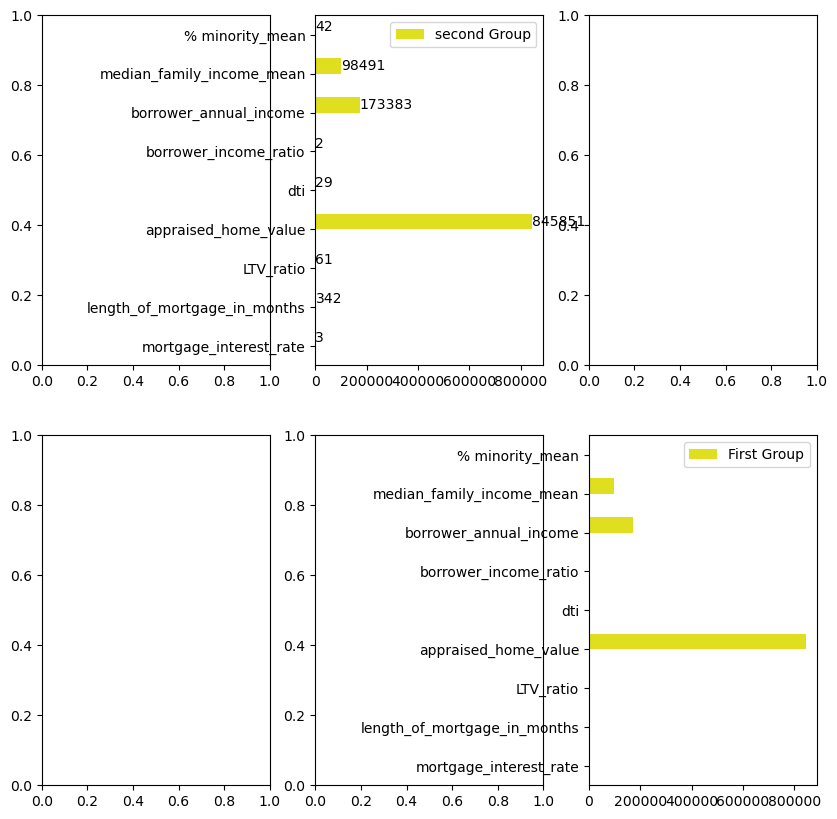

In [816]:
import seaborn as sns
fig, axes=myplot.subplots(2,3, figsize=(10,10))

minority_mean= k_second_cluster["% Minority in Local Area"].mean()
median_family_income_mean= k_second_cluster["Median Family Income in Local Area"].mean()
borrower_annual_income= k_second_cluster["Borrower Annual Income"].mean()
borrower_income_ratio= k_second_cluster["Borrower Income Ratio"].mean()
dti=  k_second_cluster["Borrower Debt to Income Ratio"].mean()
appraised_home_value=k_second_cluster["Appraised Value of Home"].mean()
LTV_ratio= k_second_cluster["LTV Ratio"].mean()
length_of_mortgage_in_months= k_second_cluster["Length of Mortgage in Months"].mean()
mortgage_interest_rate= k_second_cluster["Mortgage Interest Rate"].mean()
means=[minority_mean, median_family_income_mean,borrower_annual_income,borrower_income_ratio,dti, appraised_home_value, LTV_ratio,length_of_mortgage_in_months, mortgage_interest_rate]
all_means_series=pd.Series(means)
all_means_series.index=["% minority_mean", "median_family_income_mean","borrower_annual_income","borrower_income_ratio","dti", "appraised_home_value", "LTV_ratio","length_of_mortgage_in_months", "mortgage_interest_rate"]
print(all_means_series)

ax2=sns.barplot(data=all_means_series, orient='h', label="second Group", color='yellow',height=0.4, ax=axes[0,1])
axes[0,1].legend(loc='best')

for bar in ax2.patches:
    ax2.text(
        bar.get_width(),
        bar.get_y() + bar.get_height()/2,
        f"{bar.get_width():.0f}",
        ha='left', va='center',
        
    )




minority_mean= k_first_cluster["% Minority in Local Area"].mean()
median_family_income_mean= k_first_cluster["Median Family Income in Local Area"].mean()
borrower_annual_income= k_first_cluster["Borrower Annual Income"].mean()
borrower_income_ratio= k_first_cluster["Borrower Income Ratio"].mean()
dti=  k_first_cluster["Borrower Debt to Income Ratio"].mean()
appraised_home_value=k_first_cluster["Appraised Value of Home"].mean()
LTV_ratio= k_first_cluster["LTV Ratio"].mean()
length_of_mortgage_in_months= k_first_cluster["Length of Mortgage in Months"].mean()
mortgage_interest_rate= k_first_cluster["Mortgage Interest Rate"].mean()
means1=[minority_mean, median_family_income_mean,borrower_annual_income,borrower_income_ratio,dti, appraised_home_value, LTV_ratio,length_of_mortgage_in_months, mortgage_interest_rate]
all_means_series1=pd.Series(means1)
all_means_series1.index=["% minority_mean", "median_family_income_mean","borrower_annual_income","borrower_income_ratio","dti", "appraised_home_value", "LTV_ratio","length_of_mortgage_in_months", "mortgage_interest_rate"]


ax1=sns.barplot(data=all_means_series, orient='h', label="First Group", color='yellow',height=0.4, ax=axes[1,2])
axes[1,2].legend(loc='best')

for bar in ax.patches:
    ax.text(
        bar.get_width(),
        bar.get_y() + bar.get_height()/2,
        f"{bar.get_width():.0f}",
        ha='left', va='center',
        
    )


myplot.show()


In [817]:
# New Professional Approach 

{'whiskers': [<matplotlib.lines.Line2D at 0x188a24800>,
 'caps': [<matplotlib.lines.Line2D at 0x188861700>,
 'boxes': [<matplotlib.lines.Line2D at 0x188a25400>],
 'medians': [<matplotlib.lines.Line2D at 0x1888635f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x188861d90>],
 'means': []}

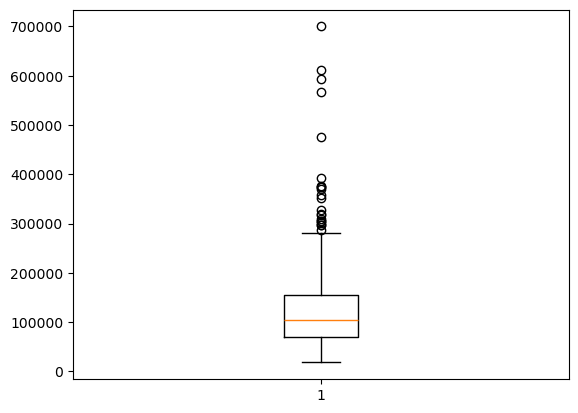

In [1583]:
myplot.boxplot(data_for_clustering["Borrower Annual Income"])

In [1588]:
new_data_for_clustering= data_for_clustering.drop(["Borrower ID Number","cluster"], axis=1)
new_data_for_clustering

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75
1,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5
2,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5
3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25
4,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87
...,...,...,...,...,...,...,...,...,...,...,...,...
495,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62
496,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3
497,17,10.96,69300,187000,2.6984,2,10,325000,145000,43.75,180,2.87
498,26,33.82,79700,109000,1.3676,2,20,525000,385000,73.46,360,3.62


In [1589]:
from sklearn.preprocessing import StandardScaler
standardised_data_for_clustering=StandardScaler().fit_transform(new_data_for_clustering)
standardised_data_for_clustering=pd.DataFrame(standardised_data_for_clustering)


In [1590]:
print(data_for_clustering["Wide Area Location Code"].mean())
print(standardised_data_for_clustering[1].mean())

25.50501002004008
-5.695733352786374e-17


In [1591]:
standardised_data_for_clustering.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02
mean,1.050151e-16,-5.695733e-17,1.423933e-16,2.847867e-17,-7.119667e-17,-3.381842e-16,-1.067950e-16,5.695733e-17,4.271800e-17,-3.631030e-16,-1.851113e-16,1.210343e-16
std,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00
min,-1.482514e+00,-1.134670e+00,-2.095021e+00,-1.281251e+00,-1.258488e+00,-2.812599e+00,-1.689307e+00,-1.577738e+00,-1.877798e+00,-3.495667e+00,-2.888326e+00,-2.472914e+00
25%,-1.059025e+00,-7.562580e-01,-6.583574e-01,-6.631620e-01,-6.435038e-01,3.555430e-01,-8.586369e-01,-6.698562e-01,-7.266663e-01,-6.377152e-01,5.290413e-01,-6.605237e-01
50%,-3.055229e-02,-3.660140e-01,-1.287263e-01,-2.371004e-01,-2.575595e-01,3.555430e-01,-2.796646e-02,-3.145983e-01,-1.511005e-01,2.153781e-01,5.290413e-01,-2.074261e-01
75%,8.466744e-01,4.755356e-01,6.451060e-01,3.629863e-01,3.872269e-01,3.555430e-01,8.857710e-01,4.748638e-01,6.403026e-01,5.545884e-01,5.290413e-01,4.812823e-01
max,1.784399e+00,2.983704e+00,3.455005e+00,6.903932e+00,7.893059e+00,3.555430e-01,1.633374e+00,5.843206e+00,3.446186e+00,1.568047e+00,5.290413e-01,5.012258e+00


<Axes: ylabel='Borrower Annual Income'>

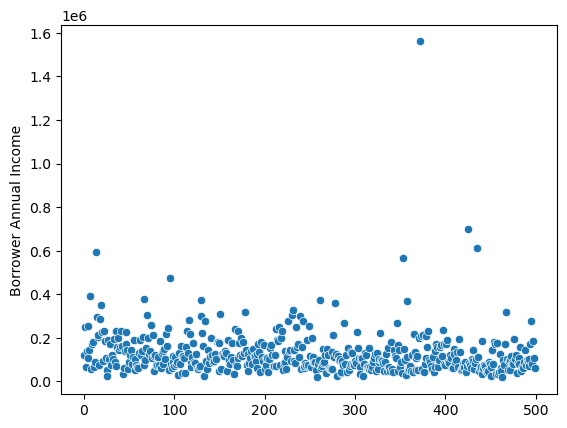

In [1592]:
sns.scatterplot(new_data_for_cluster["Borrower Annual Income"])

In [1593]:
# What is the best way to know or see whether there is an outlier in any attribute or entire data set at once?

{'whiskers': [<matplotlib.lines.Line2D at 0x183b617f0>,
 'caps': [<matplotlib.lines.Line2D at 0x183b62450>,
 'boxes': [<matplotlib.lines.Line2D at 0x188862000>],
 'medians': [<matplotlib.lines.Line2D at 0x183b607d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x183b60260>],
 'means': []}

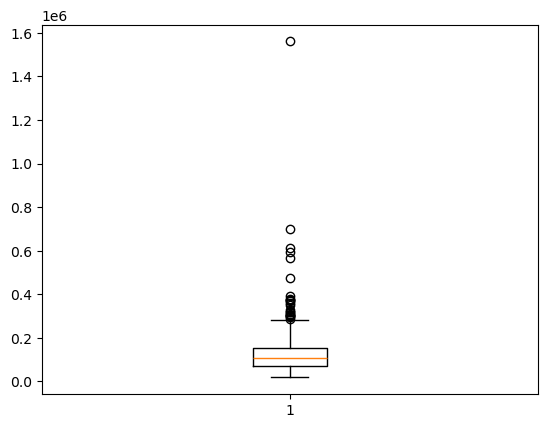

In [1594]:
myplot.boxplot(new_data_for_cluster["Borrower Annual Income"])

{'whiskers': [<matplotlib.lines.Line2D at 0x187548e60>,
 'caps': [<matplotlib.lines.Line2D at 0x187548140>,
 'boxes': [<matplotlib.lines.Line2D at 0x1874cbad0>],
 'medians': [<matplotlib.lines.Line2D at 0x187548e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x18754ac60>],
 'means': []}

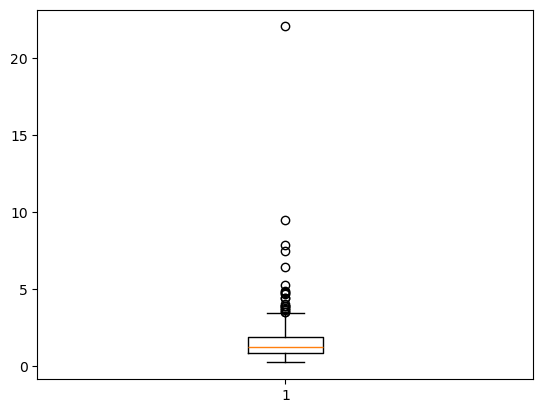

In [1595]:
myplot.boxplot(new_data_for_cluster["Borrower Income Ratio"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1881860c0>,
 'caps': [<matplotlib.lines.Line2D at 0x18754a540>,
 'boxes': [<matplotlib.lines.Line2D at 0x17fc295e0>],
 'medians': [<matplotlib.lines.Line2D at 0x188187c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1881875c0>],
 'means': []}

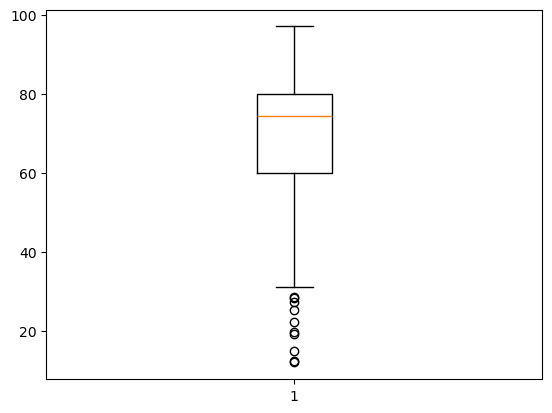

In [1596]:
myplot.boxplot(new_data_for_cluster["LTV Ratio"])


In [1598]:
new_data_for_cluster["LTV Ratio"][(new_data_for_cluster["LTV Ratio"]>=60)&(new_data_for_cluster["LTV Ratio"]<=80)].reset_index(drop=True)

0         80
1      71.44
2         60
3       65.6
4      79.44
       ...  
265       79
266       70
267    73.85
268    73.46
269       80
Name: LTV Ratio, Length: 270, dtype: object

In [1599]:
small_ltv=new_data_for_cluster[(new_data_for_cluster["LTV Ratio"]>=1)&(new_data_for_cluster["LTV Ratio"]<=35)].reset_index(drop=True)
small_ltv

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,clusters
0,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,0
1,26,13.28,79000,26000,0.3291,2,39,165000,35000,19.35,360,3.87,2
2,4,22.68,77800,51000,0.6555,2,10,355000,95000,27.42,360,3.62,0
3,34,48.53,96500,69000,0.715,2,30,305000,105000,35,360,2.5,2
4,17,12.95,89100,231000,2.5926,2,20,1465000,505000,34.95,360,2.99,4
5,6,80.94,92700,91000,0.9817,2,37,715000,225000,31.35,180,2.75,3
6,6,70.38,83300,127000,1.5246,2,20,805000,155000,19.75,360,3.12,3
7,6,75.54,127900,82000,0.6411,2,20,965000,305000,31.08,360,2.87,3
8,53,33.07,106900,125000,1.1693,2,30,765000,265000,35,180,2.5,3
9,47,7.21,80700,251000,3.1103,2,10,1425000,405000,28.34,180,2.62,4


{'whiskers': [<matplotlib.lines.Line2D at 0x1848698e0>,
 'caps': [<matplotlib.lines.Line2D at 0x188a124e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18486b830>],
 'medians': [<matplotlib.lines.Line2D at 0x188a12d80>],
 'fliers': [<matplotlib.lines.Line2D at 0x188a10380>],
 'means': []}

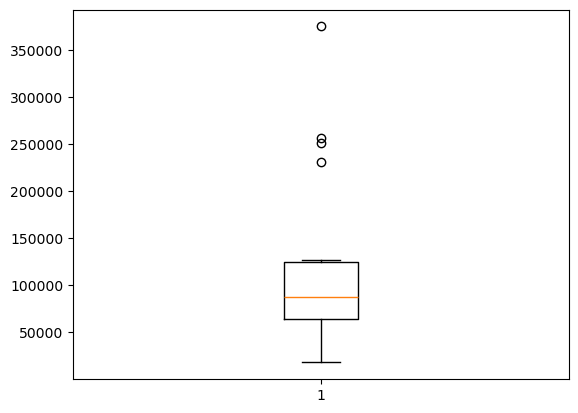

In [1600]:
myplot.boxplot(small_ltv["Borrower Annual Income"])

In [1601]:
new_data_for_cluster[new_data_for_cluster.loc[:,"Borrower Annual Income"]==new_data_for_cluster["Borrower Annual Income"].max()]

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,clusters
372,6,16.56,70700,1560000,22.0651,2,10,465000,325000,69.56,360,3.58,7


In [1603]:
data_for_clustering.shape

(499, 14)

In [1604]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
new_data_for_pca=data_for_clustering.drop("cluster", axis=1)

scalerd_data=scaler.fit_transform(new_data_for_pca)


In [1605]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
new_data_for_pca=data_for_clustering.drop("cluster", axis=1)

scalerd_data=scaler.fit_transform(new_data_for_pca)

from sklearn.decomposition import PCA
pca2= PCA(n_components=11)
new_scalered_data=pca2.fit_transform(scalerd_data)


In [1606]:
pca2.explained_variance_

array([2.95108105, 1.866121  , 1.72298155, 1.1371768 , 1.10325325,
       0.95285162, 0.83070099, 0.79026113, 0.64293725, 0.57236682,
       0.39680457])

In [1607]:
new_scalered_data

array([[ 0.33334811, -1.11274644, -1.28538099, ...,  1.0505506 ,
        -1.61487785,  0.43916376],
       [ 2.60261261,  0.24602038,  2.19528372, ...,  0.58683533,
         0.29497647, -0.39167773],
       [-0.26373015,  0.81081927, -3.75819766, ..., -0.90891375,
        -0.4857004 ,  0.70768981],
       ...,
       [ 0.49456115, -2.441359  , -2.13862193, ..., -0.37246052,
         0.24195794,  0.05661352],
       [ 0.09901973,  0.26848256,  0.74576115, ...,  0.58574498,
        -0.43608637, -0.89636504],
       [-1.68396478,  1.2687022 ,  1.45677928, ..., -1.53819825,
        -0.02731004,  0.10835196]])

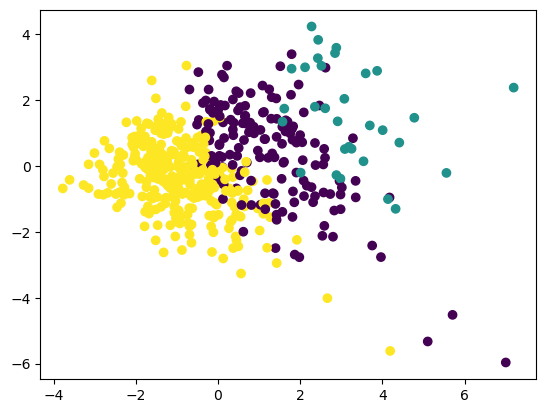

In [1608]:

myplot.scatter(new_scalered_data[:,0], new_scalered_data[:,1], c=data_for_clustering["cluster"])

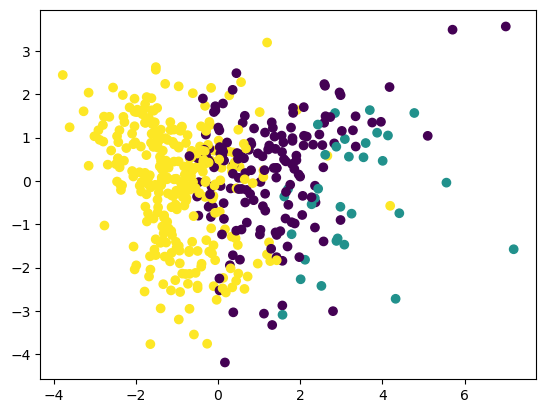

In [1609]:
myplot.scatter(new_scalered_data[:,0], new_scalered_data[:,2], c=data_for_clustering["cluster"])

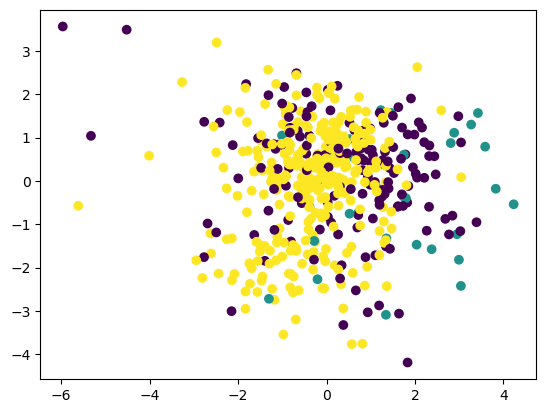

In [1610]:
myplot.scatter(new_scalered_data[:,1], new_scalered_data[:,2], c=data_for_clustering["cluster"])


In [1611]:

import numpy as np

data = new_data_for_cluster["Borrower Annual Income"]
np.percentile(data, 1)    # 1st percentile
np.percentile(data, 50)   # median
np.percentile(data, 99)

475929.9999999991

In [1612]:
data.max()

1560000

In [1613]:
import numpy as np

data = [40, 45, 48, 50, 52, 55, 60, 65, 70, 80]


np.percentile(data, 99)   # 99th percentile


79.1

### Let us Find the outliers for each column manually

In [1614]:
q1=new_data_for_cluster["Borrower Income Ratio"].quantile(0.25)
q2=new_data_for_cluster["Borrower Income Ratio"].quantile(0.50)
q3=new_data_for_cluster["Borrower Income Ratio"].quantile(0.75)
iqr=q3-q1
lower_whisker=q1- 1.5 *iqr
upper_whisker=q3 + 1.5*iqr
outliers=new_data_for_cluster[(new_data_for_cluster["Borrower Income Ratio"]<lower_whisker) | (new_data_for_cluster["Borrower Income Ratio"]>upper_whisker)] 
borrower_income_outlier=outliers["Borrower Income Ratio"]
borrower_income_outlier

7       5.2547
13      7.4404
19      4.6933
67      4.3823
70      3.6735
95      4.8668
129     4.7103
130     3.6255
134     3.8796
178     3.4858
239     3.8752
249     3.7482
261     4.4326
288      3.906
302     3.5202
353      7.867
358     4.0022
372    22.0651
425     9.4851
435     6.4017
467      4.825
Name: Borrower Income Ratio, dtype: object

In [1615]:
special_income_ratio_customer=new_data_for_cluster.iloc[list(borrower_income_outlier.index)]
special_income_ratio_customer

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,clusters
7,53,39.06,74600,392000,5.2547,2,20,265000,155000,60,360,2.99,0
13,26,33.01,79700,593000,7.4404,2,20,545000,415000,75,360,4.75,7
19,6,65.52,75000,352000,4.6933,2,30,755000,505000,68,360,4.12,5
67,34,3.31,85800,376000,4.3823,2,20,635000,475000,74.92,360,3.12,5
70,6,35.67,83300,306000,3.6735,2,10,835000,535000,64.81,360,3.25,1
95,48,15.97,97600,475000,4.8668,2,30,505000,375000,74.32,360,2.99,5
129,21,90.31,79400,374000,4.7103,1,30,115000,95000,80,360,4.25,2
130,6,78.83,83300,302000,3.6255,2,10,635000,355000,55.79,360,3.5,5
134,5,18.28,71400,277000,3.8796,2,10,145000,115000,80,360,5.12,2
178,9,7.24,91800,320000,3.4858,2,20,625000,355000,56.4,360,3.87,5


In [1616]:
l1=new_data_for_cluster["LTV Ratio"].quantile(0.25)
l2=new_data_for_cluster["LTV Ratio"].quantile(0.50)
l3=new_data_for_cluster["LTV Ratio"].quantile(0.75)
iqr=l3-l1
lower_whisker=l1- 1.5 *iqr
upper_whisker=l3 + 1.5*iqr
outliers=new_data_for_cluster[(new_data_for_cluster["LTV Ratio"]<lower_whisker) | (new_data_for_cluster["LTV Ratio"]>upper_whisker)] 
LTV_outlier=outliers["LTV Ratio"]
list(LTV_outlier)

[28.55, 19.35, 27.42, 19.75, 28.34, 25.29, 12.5, 12.06, 15, 22.41]

(array([434.,  56.,   6.,   2.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.2113 ,  2.39668,  4.58206,  6.76744,  8.95282, 11.1382 ,
        13.32358, 15.50896, 17.69434, 19.87972, 22.0651 ]),
 <BarContainer object of 10 artists>)

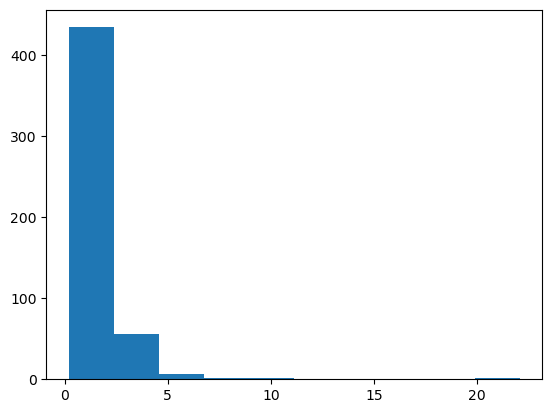

In [1617]:
myplot.hist(new_data_for_cluster["Borrower Income Ratio"].sort_values())

In [1618]:
first_percentile=np.percentile(new_data_for_cluster["LTV Ratio"], 100)
first_percentile

97.0

(array([434.,  56.,   6.,   2.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.2113 ,  2.39668,  4.58206,  6.76744,  8.95282, 11.1382 ,
        13.32358, 15.50896, 17.69434, 19.87972, 22.0651 ]),
 <BarContainer object of 10 artists>)

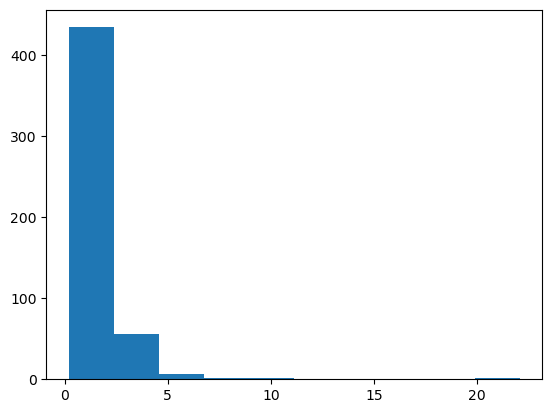

In [1619]:
myplot.hist(new_data_for_cluster["Borrower Income Ratio"].sort_values())

In [1620]:
new_data_for_cluster["LTV Ratio"].max()

97

(array([  5.,   5.,  14.,  22.,  41.,  51.,  78., 175.,  35.,  74.]),
 array([12.06 , 20.554, 29.048, 37.542, 46.036, 54.53 , 63.024, 71.518,
        80.012, 88.506, 97.   ]),
 <BarContainer object of 10 artists>)

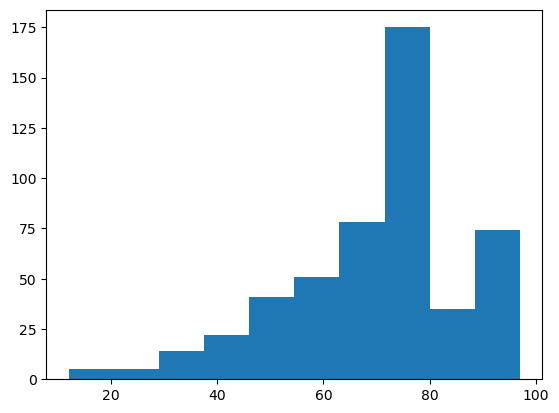

In [1621]:
myplot.hist(new_data_for_cluster["LTV Ratio"].sort_values().reset_index(drop=True))

In [1622]:
np.percentile(new_data_for_cluster["Borrower Income Ratio"].sort_values().reset_index(drop=True),99)

5.266169999999989

In [1623]:
np.percentile(new_data_for_cluster["LTV Ratio"].sort_values().reset_index(drop=True),99)


95.0

{'whiskers': [<matplotlib.lines.Line2D at 0x17eaec7a0>,
 'caps': [<matplotlib.lines.Line2D at 0x17eac2630>,
 'boxes': [<matplotlib.lines.Line2D at 0x1889d0380>],
 'medians': [<matplotlib.lines.Line2D at 0x17eac2f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x17eac2720>],
 'means': []}

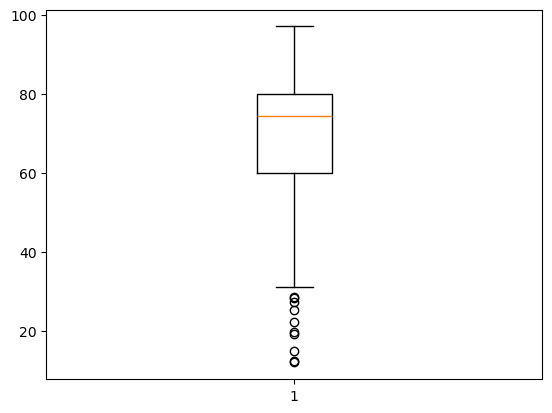

In [1624]:

myplot.boxplot(new_data_for_cluster["LTV Ratio"])

In [1625]:
list(new_data_for_cluster["Borrower Income Ratio"].sort_values())[4]

0.3281

In [1626]:
data_for_clustering.iloc[LTV_outlier.index]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,cluster
2,3,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,2
26,27,26,13.28,79000,26000,0.3291,2,39,165000,35000,19.35,360,3.87,2
94,95,4,22.68,77800,51000,0.6555,2,10,355000,95000,27.42,360,3.62,2
145,146,6,70.38,83300,127000,1.5246,2,20,805000,155000,19.75,360,3.12,0
235,236,47,7.21,80700,251000,3.1103,2,10,1425000,405000,28.34,180,2.62,1
249,250,12,25.71,68300,256000,3.7482,2,20,785000,195000,25.29,120,2.75,0
258,259,39,2.55,85200,18000,0.2113,2,47,405000,45000,12.5,240,3,2
309,310,42,2.67,82300,27000,0.3281,2,37,325000,35000,12.06,360,4.12,2
474,475,20,7.17,88800,83000,0.9347,2,30,235000,175000,75.32,180,3.25,2
493,494,4,17.66,77800,104000,1.3368,2,10,475000,205000,43.28,180,2.75,2


{'whiskers': [<matplotlib.lines.Line2D at 0x188a5c920>,
 'caps': [<matplotlib.lines.Line2D at 0x188a5d220>,
 'boxes': [<matplotlib.lines.Line2D at 0x1877f8380>],
 'medians': [<matplotlib.lines.Line2D at 0x187adb590>],
 'fliers': [<matplotlib.lines.Line2D at 0x187ad9940>],
 'means': []}

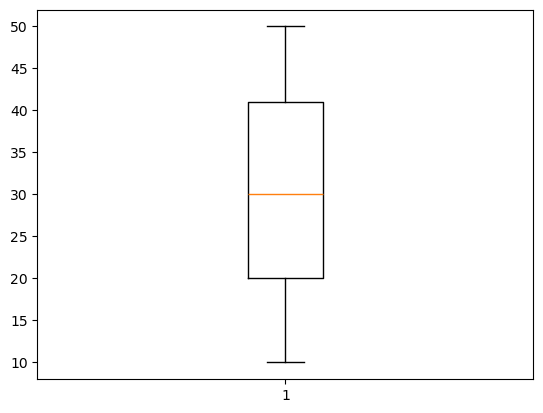

In [1627]:
myplot.boxplot(new_data_for_cluster["Borrower Debt to Income Ratio"])

In [1628]:
print(new_data_for_cluster["LTV Ratio"].median())
new_data_for_cluster["LTV Ratio"].mean()

74.295


70.69492000000005

In [1629]:
len(new_data_for_clustering.columns)

12

In [1630]:
columns=np.array(new_data_for_clustering.columns)

reshaped_columns_in_2d=columns.reshape(2,6)

reshaped_columns_in_2d

array([['Wide Area Location Code', '% Minority in Local Area',
        'Median Family Income in Local Area', 'Borrower Annual Income',
        'Borrower Income Ratio', 'First Time Buyer? (1=Yes, 2=No)'],
       ['Borrower Debt to Income Ratio', 'Appraised Value of Home',
        'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
        'Mortgage Interest Rate']], dtype=object)

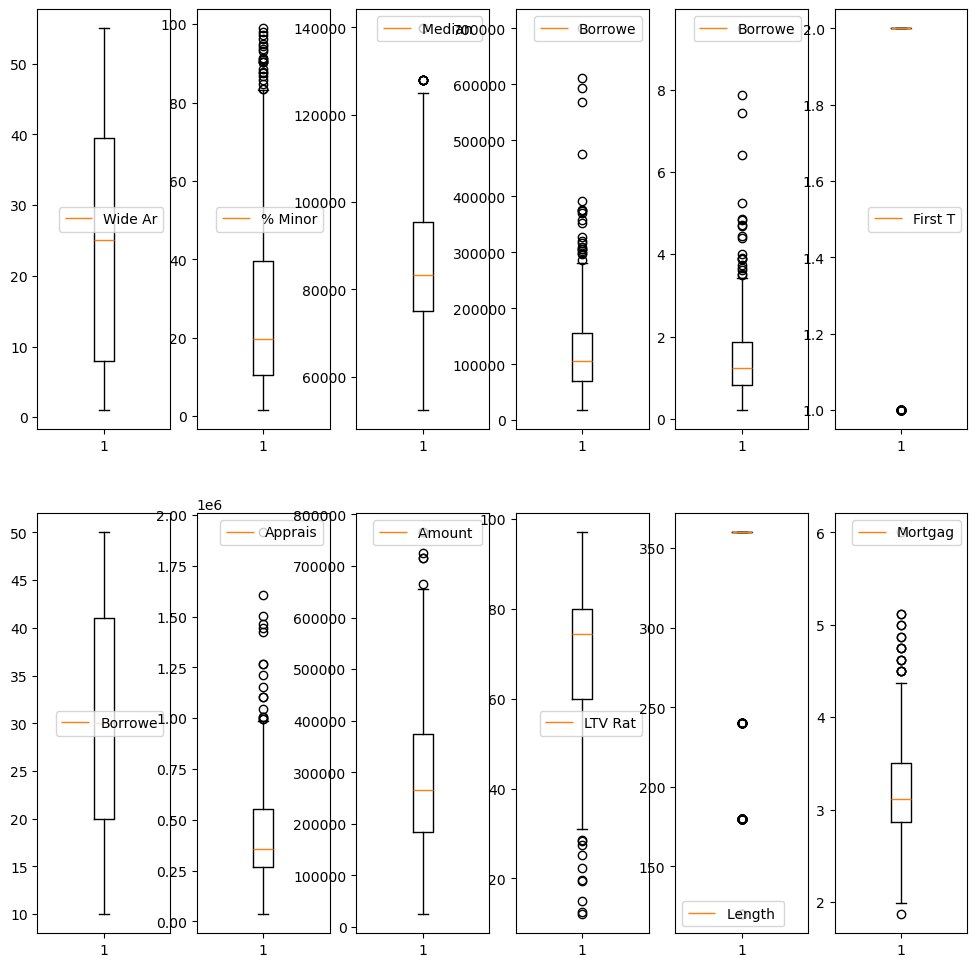

In [1633]:
fig,axes=myplot.subplots(2,6, figsize=(12,12))
for i in list(range(0,2)):
   
    for j in list(range(0,6)):
        
        axes[i,j].boxplot(new_data_for_clustering[reshaped_columns_in_2d[i,j]], label=reshaped_columns_in_2d[i,j][0:7])
        axes[i,j].legend()

myplot.show()

In [1634]:

def outlier_filler(series):
    
    # IQR 
    q1=np.quantile(series,0.25)
    q3=np.quantile(series,0.75)
    iqr=q3-q1
    
    #Whiskers
    lower_whisker=q1-1.5*iqr
    upper_whisker=q3+1.5*iqr
    
    #Outliers
    upper_outlier_index=series[(series>upper_whisker)].index
    
    lower_outlier_index=series[(series<lower_whisker)].index
    
    #Percentile
    p99=np.percentile(series,99)
    p1=np.percentile(series,1)
    
    #Capping
    series.loc[upper_outlier_index]=p99
    series.loc[lower_outlier_index]=p1
    print(series.name)
    #new_data_for_clustering[series.name]=series 

    new_data_for_clustering[series.name]=series




for column in new_data_for_clustering.columns:
    
    outlier_filler(new_data_for_clustering[column].copy())


Wide Area Location Code
% Minority in Local Area
Median Family Income in Local Area
Borrower Annual Income
Borrower Income Ratio
First Time Buyer? (1=Yes, 2=No)
Borrower Debt to Income Ratio
Appraised Value of Home
Amount Borrowed
LTV Ratio
Length of Mortgage in Months
Mortgage Interest Rate


In [1635]:
new_data_for_clustering.describe()

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
count,499,499.0000,499,499.0,499.000000,499,499,499,499,499,499,499.00
unique,47,447.0000,167,190.0,466.000000,2,18,83,63,345,2,35.00
top,6,94.3698,83300,393660.0,4.874558,2,20,265000,245000,80,360,2.87
freq,79,22.0000,26,22.0,20.000000,443,122,18,25,59,386,54.00


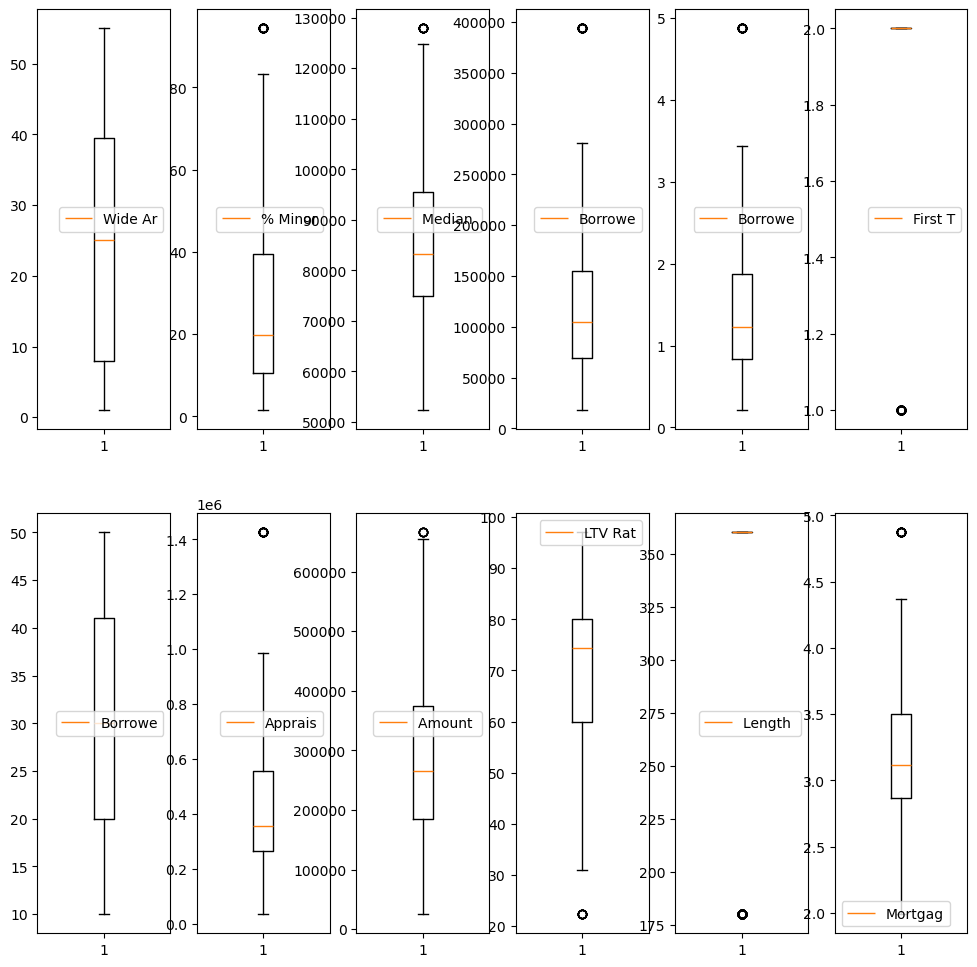

In [1636]:
fig2,axes2=myplot.subplots(2,6, figsize=(12,12))
for i in list(range(0,2)):
   
    for j in list(range(0,6)):
        
        axes2[i,j].boxplot(new_data_for_clustering[reshaped_columns_in_2d[i,j]], label=reshaped_columns_in_2d[i,j][0:7])
        axes2[i,j].legend()

myplot.show()

In [1637]:
p99

94.36979999999998

In [1643]:
new_data_for_clustering.columns


Index(['Wide Area Location Code', '% Minority in Local Area',
       'Median Family Income in Local Area', 'Borrower Annual Income',
       'Borrower Income Ratio', 'First Time Buyer? (1=Yes, 2=No)',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate'],
      dtype='object', name=0)

In [1639]:
new_data_for_clustering.head()

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75
1,6,94.3698,83300,250000,3.0012,2,30,535000,505000,95,360,3.5
2,34,64.19,96500,64000,0.6632,2,43,375000,105000,22.3568,180.0,2.5
3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180.0,2.25
4,39,17.93,84600,109000,1.2884,1.0,30,405000,325000,80,180.0,2.87


[6767187398951.8545, 6767187398951.8545]
499


,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,0
1,6,94.3698,83300,250000,3.0012,2,30,535000,505000,95,360,3.5,1
2,34,64.19,96500,64000,0.6632,2,43,375000,105000,22.3568,180.0,2.5,0
3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180.0,2.25,1
4,39,17.93,84600,109000,1.2884,1.0,30,405000,325000,80,180.0,2.87,0


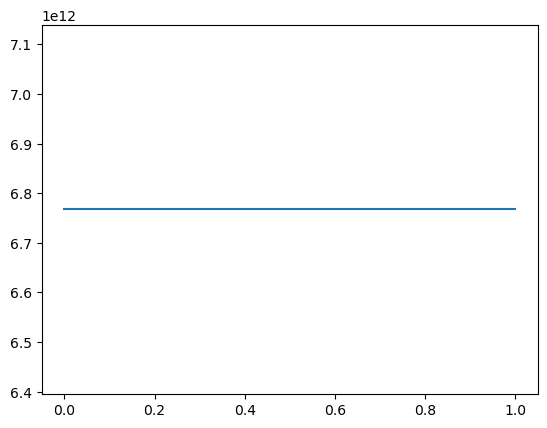

In [1648]:
# NOw let us use elbow(inertia) to find the best value of K
from sklearn.cluster import KMeans
inertia2=[]

K =range(1,3)

for k in K:
    kmean2=KMeans(n_clusters=k, random_state=42)
    kmean2.fit(new_data_for_clustering.drop(["Wide Area Location Code","First Time Buyer? (1=Yes, 2=No)"],axis=1))
    inertia2.append(kmean.inertia_)
print(inertia2)
clusters=kmean2.labels_

print(len(clusters))
k_two_means_data_set2=new_data_for_clustering.copy()
k_two_means_data_set2["Cluster"]=clusters
k_two_means_data_set2
myplot.plot(inertia2)
k_two_means_data_set2.head()

In [1330]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
new_data_for_pca2=k_five_means_data_set2.drop("Cluster", axis=1)

scalerd_data2=scaler.fit_transform(new_data_for_pca2)

from sklearn.decomposition import PCA
pca2= PCA(n_components=2)
new_scalered_data2=pca2.fit_transform(scalerd_data2)


In [1389]:
new_scalered_data2.shape

(499, 2)

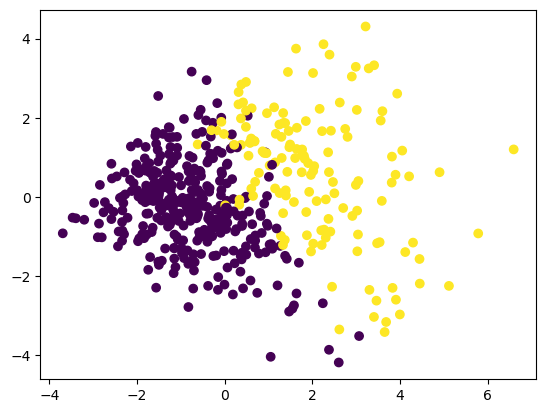

In [1331]:
myplot.scatter(new_scalered_data2[:,0], new_scalered_data2[:,1], c=k_five_means_data_set2["Cluster"])

### 3-~ Let us begin 

In [1333]:
# For comparing the groups we will see the centroid of both group and based on that we can
# Decide which of the attributes makes groups distinguishable.

In [1345]:
numeric_columns=new_data_for_clustering.select_dtypes(include='object').columns
new_data_for_clustering[numeric_columns]=new_data_for_clustering[numeric_columns].apply(pd.to_numeric, errors='coerce')

## Statistical Summary of entire data set

In [1348]:
new_data_for_clustering.describe()

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,4.990000e+02,499.000000,499.000000,499.000000,499.000000
mean,25.505010,28.495843,85281.763527,124842.725451,1.485429,1.887776,30.336673,4.401439e+05,285292.585170,70.723042,319.238477,3.236937
std,16.545953,24.085100,15633.813116,80017.454927,0.957917,0.315959,12.050549,2.683838e+05,136971.864746,16.693403,75.411996,0.550686
min,1.000000,1.490000,52300.000000,18000.000000,0.211300,1.000000,10.000000,3.500000e+04,25000.000000,22.356800,180.000000,1.990000
25%,8.000000,10.445000,74950.000000,69500.000000,0.834500,2.000000,20.000000,2.650000e+05,185000.000000,60.000000,360.000000,2.870000
50%,25.000000,19.680000,83300.000000,105000.000000,1.225600,2.000000,30.000000,3.550000e+05,265000.000000,74.310000,360.000000,3.120000
75%,39.500000,39.595000,95500.000000,155000.000000,1.879000,2.000000,41.000000,5.550000e+05,375000.000000,80.000000,360.000000,3.500000
max,55.000000,94.369800,127900.000000,393660.000000,4.874558,2.000000,50.000000,1.425400e+06,666000.000000,97.000000,360.000000,4.872600


## Centroid Inforamtion per Cluster

In [1361]:

centroid_information_data_frame=pd.DataFrame(kmean2.cluster_centers_, columns=new_data_for_clustering.columns,index=["Cluster1","Cluster2"])
centroid_information_data_frame

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
Cluster1,27.617318,25.546670,81814.525140,102112.569832,1.280857,1.860335,30.276536,308296.089385,220251.396648,73.487218,315.251397,3.274208
Cluster2,20.141844,35.983813,94085.106383,182554.751773,2.004841,1.957447,30.489362,774906.382979,450432.624113,63.704780,329.361702,3.142306


## PCA information per component

In [1358]:
pca_comparision=pd.DataFrame(pca2.components_, columns=new_data_for_clustering.columns, index=['PC1','PC2'])
pca_comparision

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
PC1,-0.123162,0.134366,0.209762,0.479081,0.414277,0.139118,-0.159681,0.472513,0.453778,-0.178763,-0.041030,-0.118144
PC2,-0.212738,0.303042,0.378151,-0.340426,-0.456200,0.022196,0.461417,0.305700,0.231961,-0.136909,0.114232,-0.058751


In [1380]:
new_k_cluster_centers=[item[:-1] for item in kmeans.cluster_centers_]
new_k_cluster_centers
centroids = pd.DataFrame(
    new_k_cluster_centers,
    columns=new_data_for_clustering.columns
)

In [1381]:
new_k_cluster_centers=[item[:-1] for item in kmeans.cluster_centers_]
new_k_cluster_centers

[array([2.31031056e+02, 2.34472050e+01, 3.30779503e+01, 9.11024845e+04,
        1.73397516e+05, 2.00701242e+00, 1.95031056e+00, 3.07329193e+01,
        5.95062112e+05, 3.98291925e+05, 6.89608075e+01, 3.31304348e+02]),
 array([2.32375000e+02, 1.67187500e+01, 3.90287500e+01, 9.90937500e+04,
        1.89093750e+05, 1.98239688e+00, 1.93750000e+00, 2.97187500e+01,
        1.09968750e+06, 5.36875000e+05, 5.15709375e+01, 3.24375000e+02]),
 array([2.62599349e+02, 2.74364821e+01, 2.47053746e+01, 8.08195440e+04,
        9.72149837e+04, 1.22903225e+00, 1.85016287e+00, 3.01270358e+01,
        2.81384365e+05, 2.01091205e+05, 7.35977199e+01, 3.18371336e+02])]

In [1385]:
new_data_for_clustering.head()


,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,53,29.5700,91700,123000.0,1.3413,2,10,385000.0,195000.0,50.6500,360,2.75
1,6,94.3698,83300,250000.0,3.0012,2,30,535000.0,505000.0,95.0000,360,3.50
2,34,64.1900,96500,64000.0,0.6632,2,43,375000.0,105000.0,22.3568,180,2.50
3,51,34.5800,124900,141000.0,1.1289,2,46,665000.0,345000.0,51.5100,180,2.25
4,39,17.9300,84600,109000.0,1.2884,1,30,405000.0,325000.0,80.0000,180,2.87


In [1382]:
centroids

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,231.031056,23.447205,33.077950,91102.484472,173397.515528,2.007012,1.950311,30.732919,5.950621e+05,398291.925466,68.960807,331.304348
1,232.375000,16.718750,39.028750,99093.750000,189093.750000,1.982397,1.937500,29.718750,1.099688e+06,536875.000000,51.570937,324.375000
2,262.599349,27.436482,24.705375,80819.543974,97214.983713,1.229032,1.850163,30.127036,2.813844e+05,201091.205212,73.597720,318.371336


In [1386]:
centroid_diff = (centroids.loc[1] - centroids.loc[2]).abs()
centroid_diff.sort_values(ascending=False)

0
Amount Borrowed                       818303.135179
LTV Ratio                             335783.794788
Borrower Income Ratio                  91878.766287
Borrower Annual Income                 18274.206026
Wide Area Location Code                   30.224349
Length of Mortgage in Months              22.026782
Median Family Income in Local Area        14.323375
% Minority in Local Area                  10.717732
Mortgage Interest Rate                     6.003664
First Time Buyer? (1=Yes, 2=No)            0.753365
Appraised Value of Home                    0.408286
Borrower Debt to Income Ratio              0.087337
dtype: float64

In [1387]:
df_clustered = new_data_for_clustering.copy()
df_clustered['cluster'] = kmeans.labels_[0:499]

within_std = (
    df_clustered
    .groupby('cluster')
    .std()
    .mean()
)

importance = centroid_diff / within_std
importance.sort_values(ascending=False)


0
Borrower Income Ratio                 91649.975712
LTV Ratio                             19544.368555
Mortgage Interest Rate                   11.268944
Amount Borrowed                           6.419863
First Time Buyer? (1=Yes, 2=No)           2.395872
Wide Area Location Code                   1.818778
% Minority in Local Area                  0.425602
Length of Mortgage in Months              0.300466
Borrower Annual Income                    0.212936
Borrower Debt to Income Ratio             0.007258
Median Family Income in Local Area        0.000874
Appraised Value of Home                   0.000002
dtype: float64

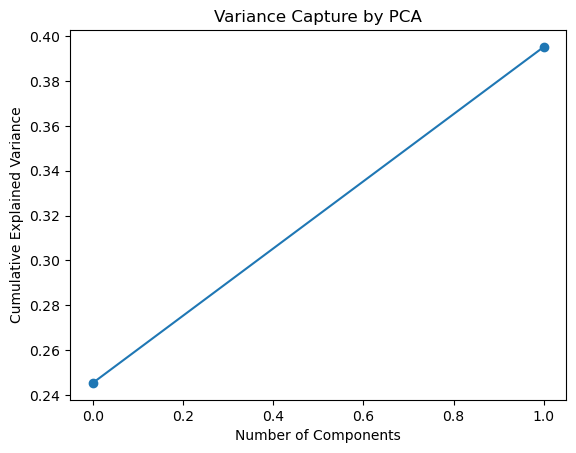

In [1391]:
myplot.plot(np.cumsum(pca2.explained_variance_ratio_), marker='o')
myplot.xlabel('Number of Components')
myplot.ylabel('Cumulative Explained Variance')
myplot.title('Variance Capture by PCA')
myplot.show()

In [1392]:
pca2.explained_variance_ratio_

array([0.24538735, 0.14985586])

In [1393]:
np.cumsum(pca2.explained_variance_ratio_)

array([0.24538735, 0.39524321])

kmean2

In [1400]:
new_data_for_clustering["clusters"]=kmean2.labels_

499

Index(['Wide Area Location Code', '% Minority in Local Area',
       'Median Family Income in Local Area', 'Borrower Annual Income',
       'Borrower Income Ratio', 'First Time Buyer? (1=Yes, 2=No)',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate', 'clusters'],
      dtype='object', name=0)


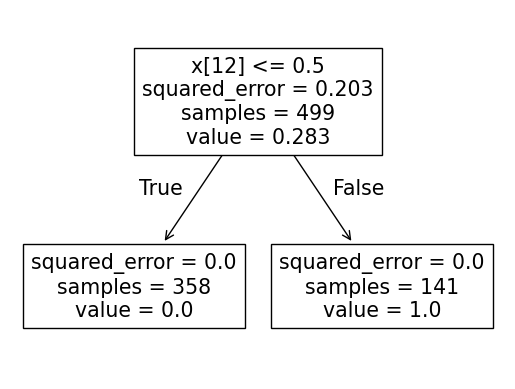

|--- clusters <= 0.50
|   |--- value: [0.00]
|--- clusters >  0.50
|   |--- value: [1.00]



In [1402]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=new_data_for_clustering
y=new_data_for_clustering["clusters"]

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.0001, random_state=42)
print(X_train.columns)

model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=3,
    random_state=42,
    min_samples_leaf=15
)


model.fit(X, y)
plot_tree(model)
myplot.show()
rules=export_text(model, feature_names=X_train.columns)
print(rules)

In [1403]:
new_data_for_clustering.columns[12]

'clusters'

In [1404]:
new_data_for_clustering.head()

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,clusters
0,53,29.5700,91700,123000.0,1.3413,2,10,385000.0,195000.0,50.6500,360,2.75,0
1,6,94.3698,83300,250000.0,3.0012,2,30,535000.0,505000.0,95.0000,360,3.50,1
2,34,64.1900,96500,64000.0,0.6632,2,43,375000.0,105000.0,22.3568,180,2.50,0
3,51,34.5800,124900,141000.0,1.1289,2,46,665000.0,345000.0,51.5100,180,2.25,1
4,39,17.9300,84600,109000.0,1.2884,1,30,405000.0,325000.0,80.0000,180,2.87,0


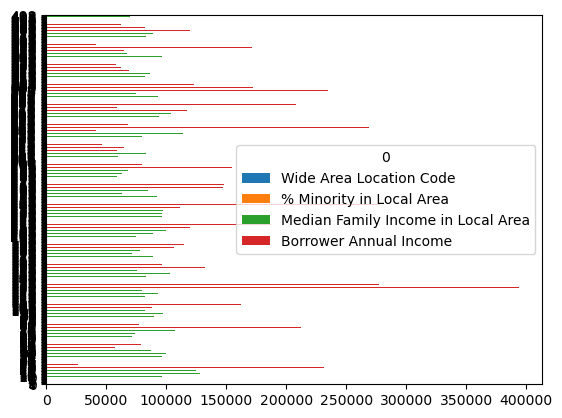

In [1426]:
axes=new_data_for_clustering[new_data_for_clustering.columns[:4]].plot(kind='barh')

myplot.show()

In [1413]:
y=range(len(new_data_for_clustering.columns)+1)

In [1414]:
print(y)

range(0, 14)


In [1420]:
new_data_for_clustering.columns[:4]

Index(['Wide Area Location Code', '% Minority in Local Area',
       'Median Family Income in Local Area', 'Borrower Annual Income'],
      dtype='object', name=0)

<Axes: >

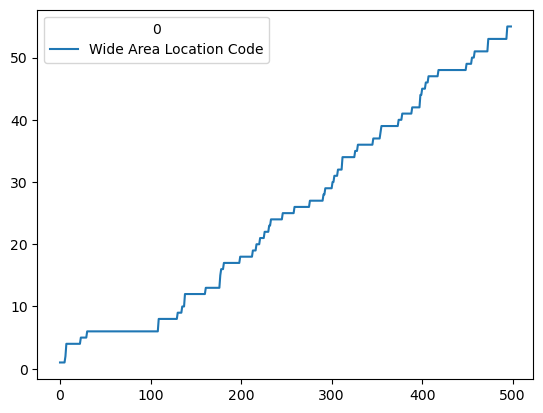

In [1447]:
demo=new_data_for_clustering[new_data_for_clustering.columns[:1]]
demo.sort_values(by='Wide Area Location Code').reset_index(drop=True).plot(kind='line')

In [1441]:
demo.T


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,,,,,,,,,,,,,,,,,,,,,
Wide Area Location Code,53,6,34,51,39,24,8,53,36,48,...,6,37,6,4,8,37,8,17,26,34


In [1456]:
two_groups_of_customer=new_data_for_clustering.groupby(by="clusters")
#two_groups_of_customer.get_group("First Time Buyer? (1=Yes, 2=No)"==1)

In [1478]:
group1=two_groups_of_customer.get_group(0)
group1

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,clusters
0,53,29.57,91700,123000.0,1.341300,2,10,385000.0,195000.0,50.6500,360,2.75,0
2,34,64.19,96500,64000.0,0.663200,2,43,375000.0,105000.0,22.3568,180,2.50,0
4,39,17.93,84600,109000.0,1.288400,1,30,405000.0,325000.0,80.0000,180,2.87,0
6,8,81.63,100000,145000.0,1.450000,1,30,475000.0,395000.0,85.0000,180,2.12,0
7,53,39.06,74600,393660.0,4.874558,2,20,265000.0,155000.0,60.0000,360,2.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,37,25.24,94100,95000.0,1.009600,1,30,405000.0,345000.0,85.9100,360,2.62,0
493,4,17.66,77800,104000.0,1.336800,2,10,475000.0,205000.0,43.2800,180,2.75,0
496,8,14.48,100000,79000.0,0.790000,2,20,425000.0,315000.0,73.8500,360,3.00,0
497,17,10.96,69300,187000.0,2.698400,2,10,325000.0,145000.0,43.7500,180,2.87,0


In [1477]:
group2=two_groups_of_customer.get_group(1)
group2

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,clusters
1,6,94.3698,83300,250000.0,3.0012,2,30,535000.0,505000.0,95.0000,360,3.50,1
3,51,34.5800,124900,141000.0,1.1289,2,46,665000.0,345000.0,51.5100,180,2.25,1
5,24,29.1800,124900,255000.0,2.0416,2,20,905000.0,645000.0,71.4400,360,2.86,1
9,48,41.4700,80000,170000.0,2.1250,2,20,535000.0,355000.0,65.6000,180,2.37,1
12,6,94.3698,127900,88000.0,0.6880,2,38,755000.0,385000.0,50.3300,360,2.87,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6,17.5900,92700,97000.0,1.0464,2,44,765000.0,605000.0,79.0000,360,2.69,1
492,6,44.8000,102700,70000.0,0.6816,2,45,655000.0,145000.0,22.3568,180,2.50,1
494,8,21.4900,100000,172000.0,1.7200,2,20,535000.0,375000.0,70.0000,360,3.50,1
495,37,40.2800,80100,275000.0,3.4332,2,20,755000.0,505000.0,90.0000,360,2.62,1


In [1482]:
centroid_data_frame=pd.DataFrame(kmean2.cluster_centers_, columns=new_data_for_clustering.drop("clusters",axis=1).columns)
centroid_data_frame

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,27.617318,25.546670,81814.525140,102112.569832,1.280857,1.860335,30.276536,308296.089385,220251.396648,73.487218,315.251397,3.274208
1,20.141844,35.983813,94085.106383,182554.751773,2.004841,1.957447,30.489362,774906.382979,450432.624113,63.704780,329.361702,3.142306


{'whiskers': [<matplotlib.lines.Line2D at 0x1879b6cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1698b2ff0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1879b7e60>],
 'medians': [<matplotlib.lines.Line2D at 0x1879b6f30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1879b7080>],
 'means': []}

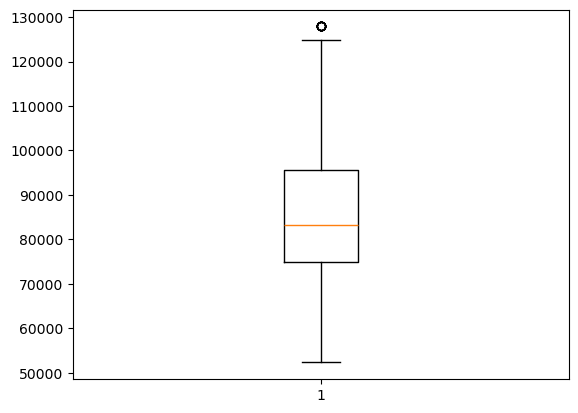

In [1483]:
myplot.boxplot(new_data_for_clustering["Median Family Income in Local Area"])

In [1570]:
group1_statistical_mean=group1.apply(lambda x:x.agg( ['mean','median']   ))
group1_statistical_mean

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,clusters
mean,27.617318,25.54667,81814.52514,102112.569832,1.280857,1.860335,30.276536,308296.089385,220251.396648,73.487218,315.251397,3.274208,0.0
median,26.000000,17.99000,80850.00000,88000.000000,1.092450,2.000000,30.000000,305000.000000,225000.000000,76.920000,360.000000,3.250000,0.0


In [1569]:
group2_statistical_mean=group2.apply(lambda x:x.agg( ['mean','median']   ))
group2_statistical_mean

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,clusters
mean,20.141844,35.983813,94085.106383,182554.751773,2.004841,1.957447,30.489362,774906.382979,450432.624113,63.70478,329.361702,3.142306,1.0
median,9.000000,28.430000,92700.000000,160000.000000,1.728700,2.000000,30.000000,685000.000000,455000.000000,68.00000,360.000000,3.000000,1.0


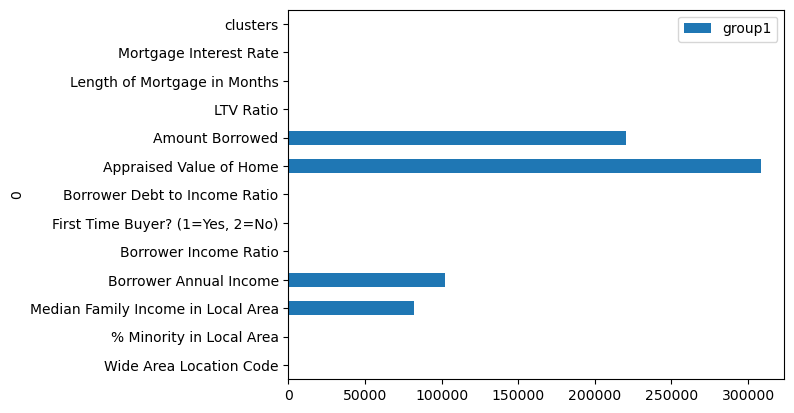

In [1511]:
g1s=group1_statistical_mean.plot(kind='barh',label="group1")
g1s.legend()

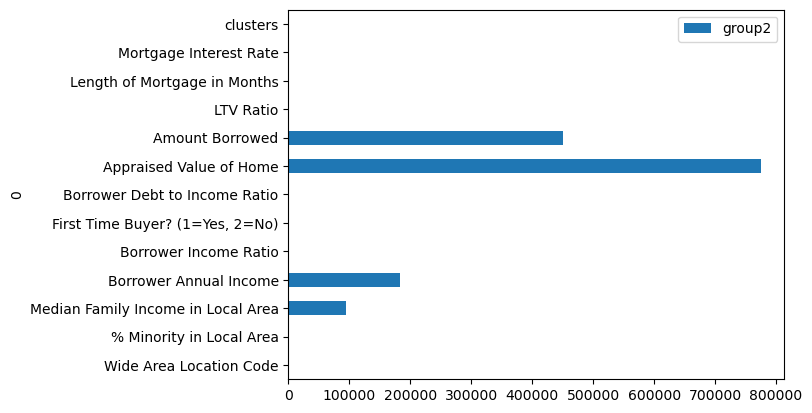

In [1512]:
g2s=group2_statistical_mean.plot(kind='barh', label='group2')
g2s.legend()

In [1490]:
group2["Wide Area Location Code"].value_counts()[:2]

Wide Area Location Code
6    52
8    13
Name: count, dtype: int64

In [1492]:
group1["Wide Area Location Code"].value_counts()[:5]

Wide Area Location Code
6     27
48    26
12    21
39    17
17    16
Name: count, dtype: int64

In [1494]:
group1["Borrower Annual Income"].value_counts()

Borrower Annual Income
82000.0     8
62000.0     7
88000.0     7
69000.0     7
76000.0     6
           ..
126000.0    1
175000.0    1
131000.0    1
30000.0     1
38000.0     1
Name: count, Length: 148, dtype: int64

In [1495]:
group1["First Time Buyer? (1=Yes, 2=No)"].value_counts()

First Time Buyer? (1=Yes, 2=No)
2    308
1     50
Name: count, dtype: int64

In [1496]:
group2["First Time Buyer? (1=Yes, 2=No)"].value_counts()

First Time Buyer? (1=Yes, 2=No)
2    135
1      6
Name: count, dtype: int64

In [1497]:
new_data_for_clustering["First Time Buyer? (1=Yes, 2=No)"].value_counts()

First Time Buyer? (1=Yes, 2=No)
2    443
1     56
Name: count, dtype: int64

In [1498]:
group=new_data_for_clustering.groupby(by="First Time Buyer? (1=Yes, 2=No)")["Borrower Annual Income"]

In [1502]:
group.get_group(1).mean()

97779.64285714283

In [1503]:
group.get_group(2).mean()

128263.79232505636

In [1526]:
group1_statistical_mean.reset_index
group1_statistical_mean

0
Wide Area Location Code                   27.617318
% Minority in Local Area                  25.546670
Median Family Income in Local Area     81814.525140
Borrower Annual Income                102112.569832
Borrower Income Ratio                      1.280857
First Time Buyer? (1=Yes, 2=No)            1.860335
Borrower Debt to Income Ratio             30.276536
Appraised Value of Home               308296.089385
Amount Borrowed                       220251.396648
LTV Ratio                                 73.487218
Length of Mortgage in Months             315.251397
Mortgage Interest Rate                     3.274208
clusters                                   0.000000
dtype: float64

In [1531]:
group1_df=pd.DataFrame(group1_statistical_mean)
group1_df.columns.name="Group1"
group1_df.reset_index(drop=True)

Group1,0
0,27.617318
1,25.546670
2,81814.525140
3,102112.569832
4,1.280857
5,1.860335
6,30.276536
7,308296.089385
8,220251.396648
9,73.487218


In [1533]:
group2_df=pd.DataFrame(group2_statistical_mean)
group2_df.columns.name="Group2"
group2_df.reset_index(drop=True)

Group2,0
0,20.141844
1,35.983813
2,94085.106383
3,182554.751773
4,2.004841
5,1.957447
6,30.489362
7,774906.382979
8,450432.624113
9,63.704780


In [1539]:
joined_stat_df=group1_df.join(group2_df, lsuffix='_Group1', rsuffix='_Group2')
joined_stat_df

,0_Group1,0_Group2
0,,
Wide Area Location Code,27.617318,20.141844
% Minority in Local Area,25.546670,35.983813
Median Family Income in Local Area,81814.525140,94085.106383
Borrower Annual Income,102112.569832,182554.751773
Borrower Income Ratio,1.280857,2.004841
"First Time Buyer? (1=Yes, 2=No)",1.860335,1.957447
Borrower Debt to Income Ratio,30.276536,30.489362
Appraised Value of Home,308296.089385,774906.382979
Amount Borrowed,220251.396648,450432.624113


<Axes: xlabel='0'>

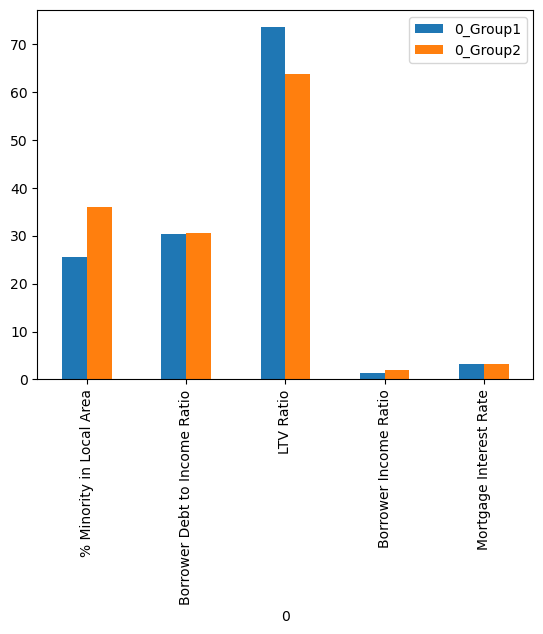

In [1568]:
columns=["% Minority in Local Area", "Borrower Debt to Income Ratio","LTV Ratio","Borrower Income Ratio","Mortgage Interest Rate"]
joined_stat_df.loc[columns].plot(kind='bar')

In [1564]:
columns2=[index for index in  joined_stat_df.index if index not in columns ]

In [1565]:
columns2=np.array(columns2)
columns2=columns2[[1,2,4,5]]
columns2

array(['Median Family Income in Local Area', 'Borrower Annual Income',
       'Appraised Value of Home', 'Amount Borrowed'], dtype='<U34')

<Axes: xlabel='0'>

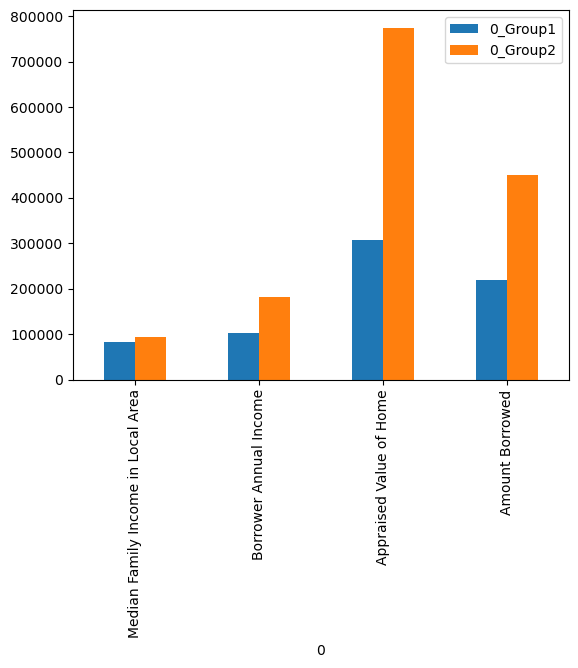

In [1567]:
joined_stat_df.loc[columns2].plot(kind='bar')

In [1573]:
centroid_data_frame

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,27.617318,25.546670,81814.525140,102112.569832,1.280857,1.860335,30.276536,308296.089385,220251.396648,73.487218,315.251397,3.274208
1,20.141844,35.983813,94085.106383,182554.751773,2.004841,1.957447,30.489362,774906.382979,450432.624113,63.704780,329.361702,3.142306


In [1576]:
dataSet.columns

Index(['Borrower ID Number', 'Wide Area Location Code',
       '% Minority in Local Area', 'Median Family Income in Local Area',
       'Borrower Annual Income', 'Borrower Income Ratio',
       'First Time Buyer? (1=Yes, 2=No)', 'Age of Borrower',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate'],
      dtype='object', name=0)

In [1580]:
dataSet["Age of Borrower"].value_counts()

Age of Borrower
35 to 44    139
45 to 54     97
55 to 64     88
65 to 74     60
25 to 34     50
< 25         47
> 74         19
Name: count, dtype: int64

In [1581]:
dataSet["Age of Borrower"].value_counts(normalize=True)

Age of Borrower
35 to 44    0.278
45 to 54    0.194
55 to 64    0.176
65 to 74    0.120
25 to 34    0.100
< 25        0.094
> 74        0.038
Name: proportion, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x187fe4500>,
 'caps': [<matplotlib.lines.Line2D at 0x187fe4cb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x187fe78f0>],
 'medians': [<matplotlib.lines.Line2D at 0x187fe6300>],
 'fliers': [<matplotlib.lines.Line2D at 0x187fe50d0>],
 'means': []}

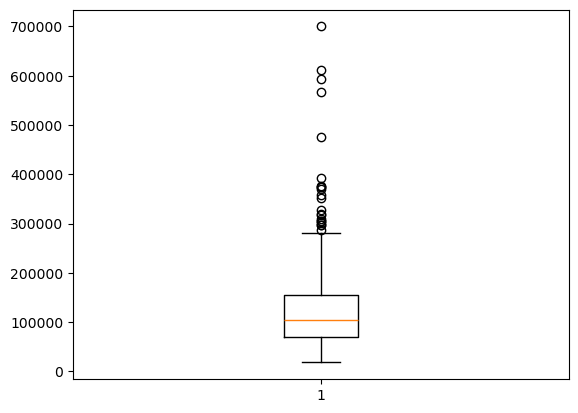

In [1587]:
myplot.boxplot(data_for_clustering["Borrower Annual Income"])

In [1649]:
k_two_means_data_set2["Age of Borrower"]=dataSet["Age of Borrower"]

In [1651]:
len(dataSet.columns)

14

In [1650]:
len(k_two_means_data_set2.columns)

14

In [1652]:
k_two_means_data_set2.columns

Index(['Wide Area Location Code', '% Minority in Local Area',
       'Median Family Income in Local Area', 'Borrower Annual Income',
       'Borrower Income Ratio', 'First Time Buyer? (1=Yes, 2=No)',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate', 'Cluster', 'Age of Borrower'],
      dtype='object', name=0)

In [1653]:
dataSet.columns

Index(['Borrower ID Number', 'Wide Area Location Code',
       '% Minority in Local Area', 'Median Family Income in Local Area',
       'Borrower Annual Income', 'Borrower Income Ratio',
       'First Time Buyer? (1=Yes, 2=No)', 'Age of Borrower',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate'],
      dtype='object', name=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x18620eb40>,
 'caps': [<matplotlib.lines.Line2D at 0x18620f710>,
 'boxes': [<matplotlib.lines.Line2D at 0x18620c1a0>],
 'medians': [<matplotlib.lines.Line2D at 0x18620f4a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18620e900>],
 'means': []}

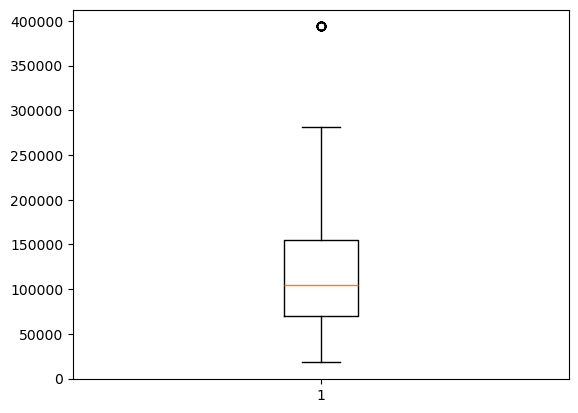

In [1656]:
k_two_means_data_set2.head()

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster,Age of Borrower
0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,0,< 25
1,6,94.3698,83300,250000,3.0012,2,30,535000,505000,95,360,3.5,1,< 25
2,34,64.19,96500,64000,0.6632,2,43,375000,105000,22.3568,180.0,2.5,0,< 25
3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180.0,2.25,1,< 25
4,39,17.93,84600,109000,1.2884,1.0,30,405000,325000,80,180.0,2.87,0,< 25


In [1864]:
age_profiling=k_two_means_data_set2.groupby('Cluster')["Age of Borrower"]

In [1865]:
cluster1_age_profiling=age_profiling.get_group(0).value_counts(normalize=True)
cluster1_age_profiling

Age of Borrower
35 to 44    0.259777
45 to 54    0.209497
55 to 64    0.181564
65 to 74    0.128492
25 to 34    0.106145
< 25        0.081006
> 74        0.033520
Name: proportion, dtype: float64

In [1866]:
cluster2_age_profiling=age_profiling.get_group(1).value_counts(normalize=True)
cluster2_age_profiling

Age of Borrower
35 to 44    0.326241
45 to 54    0.156028
55 to 64    0.156028
< 25        0.127660
65 to 74    0.099291
25 to 34    0.085106
> 74        0.049645
Name: proportion, dtype: float64

In [1867]:
area_code_profiling=k_two_means_data_set2.groupby("Cluster")["Wide Area Location Code"]

cluster1_top_ten_area_code=area_code_profiling.get_group(0).value_counts(normalize=True)[:10]
cluster1_top_ten_area_code



Wide Area Location Code
6     0.075419
48    0.072626
12    0.058659
39    0.047486
17    0.044693
26    0.041899
4     0.039106
18    0.036313
53    0.036313
13    0.036313
Name: proportion, dtype: float64

In [1868]:
cluster2_top_ten_area_code=area_code_profiling.get_group(1).value_counts(normalize=True)[:10]
cluster2_top_ten_area_code



Wide Area Location Code
6     0.368794
8     0.092199
53    0.056738
36    0.049645
24    0.035461
48    0.035461
37    0.035461
51    0.028369
34    0.028369
25    0.028369
Name: proportion, dtype: float64

1.0000000000000004

In [1876]:
buyer_profiling=k_two_means_data_set2.groupby("Cluster")["First Time Buyer? (1=Yes, 2=No)"]
buyer_profiling=buyer_profiling.get_group(0).value_counts(normalize=True)
cluster1_buyer_profiling=buyer_profiling
cluster1_buyer_profiling

First Time Buyer? (1=Yes, 2=No)
2      0.860335
1.0    0.139665
Name: proportion, dtype: float64

In [1877]:
buyer_profiling=k_two_means_data_set2.groupby("Cluster")["First Time Buyer? (1=Yes, 2=No)"]

cluster2_buyer_profiling=buyer_profiling.get_group(1).value_counts(normalize=True)
cluster2_buyer_profiling

First Time Buyer? (1=Yes, 2=No)
2      0.957447
1.0    0.042553
Name: proportion, dtype: float64

First Time Buyer? (1=Yes, 2=No)
2      443
1.0     56
Name: count, dtype: int64

In [1704]:
new_clusters=k_two_means_data_set2.groupby("Cluster")
cluster1=new_clusters.get_group(0)
cluster2=new_clusters.get_group(1)
cluster1

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster,Age of Borrower
0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,0,< 25
2,34,64.19,96500,64000,0.6632,2,43,375000,105000,22.3568,180.0,2.5,0,< 25
4,39,17.93,84600,109000,1.2884,1.0,30,405000,325000,80,180.0,2.87,0,< 25
6,8,81.63,100000,145000,1.45,1.0,30,475000,395000,85,180.0,2.12,0,< 25
7,53,39.06,74600,393660.0,4.874558,2,20,265000,155000,60,360,2.99,0,< 25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,37,25.24,94100,95000,1.0096,1.0,30,405000,345000,85.91,360,2.62,0,> 74
493,4,17.66,77800,104000,1.3368,2,10,475000,205000,43.28,180.0,2.75,0,> 74
496,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3,0,> 74
497,17,10.96,69300,187000,2.6984,2,10,325000,145000,43.75,180.0,2.87,0,> 74


In [1812]:
cluster1_df=pd.DataFrame(cluster1.drop(["Age of Borrower","Wide Area Location Code","First Time Buyer? (1=Yes, 2=No)","Cluster"], axis=1).apply(lambda x:x.agg("median") ))
cluster1_df.reset_index(inplace=True, drop=True)

cluster1_df.columns=["Cluster 1"]

cluster1_df

,Cluster 1
0,17.99000
1,80850.00000
2,88000.00000
3,1.09245
4,30.00000
5,305000.00000
6,225000.00000
7,76.92000
8,360.00000
9,3.25000


In [1813]:
cluster2_df=pd.DataFrame(cluster2.drop(["Age of Borrower","Wide Area Location Code","First Time Buyer? (1=Yes, 2=No)","Cluster"], axis=1).apply(lambda x:x.agg("median") ))
cluster2_df.reset_index(inplace=True, drop=True)

cluster2_df.columns=["Cluster 2"]

cluster2_df

,Cluster 2
0,28.4300
1,92700.0000
2,160000.0000
3,1.7287
4,30.0000
5,685000.0000
6,455000.0000
7,68.0000
8,360.0000
9,3.0000


In [1814]:
columns_for_joined_clusters=cluster1.drop(["Age of Borrower","Wide Area Location Code","First Time Buyer? (1=Yes, 2=No)","Cluster"], axis=1).columns
columns_for_joined_clusters

Index(['% Minority in Local Area', 'Median Family Income in Local Area',
       'Borrower Annual Income', 'Borrower Income Ratio',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate'],
      dtype='object', name=0)

In [1815]:
joined_clusters1_and_2=cluster1_df.join(cluster2_df)
joined_clusters1_and_2.index=columns_for_joined_clusters
joined_clusters1_and_2.index.name=None
joined_clusters1_and_2

,Cluster 1,Cluster 2
% Minority in Local Area,17.99000,28.4300
Median Family Income in Local Area,80850.00000,92700.0000
Borrower Annual Income,88000.00000,160000.0000
Borrower Income Ratio,1.09245,1.7287
Borrower Debt to Income Ratio,30.00000,30.0000
Appraised Value of Home,305000.00000,685000.0000
Amount Borrowed,225000.00000,455000.0000
LTV Ratio,76.92000,68.0000
Length of Mortgage in Months,360.00000,360.0000
Mortgage Interest Rate,3.25000,3.0000


In [1816]:
joined_clusters1_and_2.index

Index(['% Minority in Local Area', 'Median Family Income in Local Area',
       'Borrower Annual Income', 'Borrower Income Ratio',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate'],
      dtype='object')

In [1833]:
borrower_leverage_and_affordability_metrics=joined_clusters1_and_2.loc[['Borrower Debt to Income Ratio','LTV Ratio']]

<Axes: >

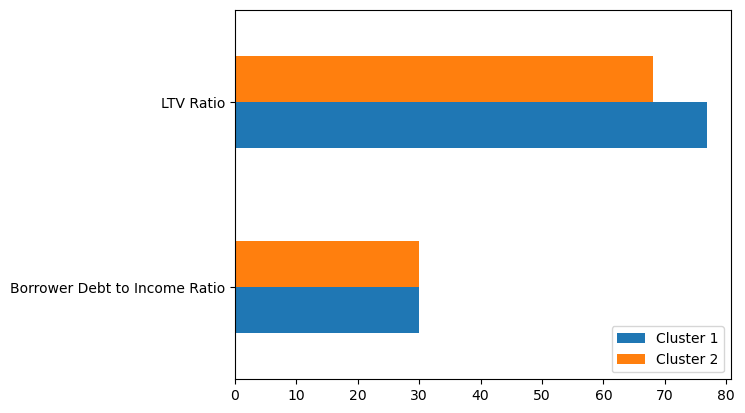

In [1847]:
borrower_leverage_and_affordability_metrics.plot(kind='barh')

<Axes: >

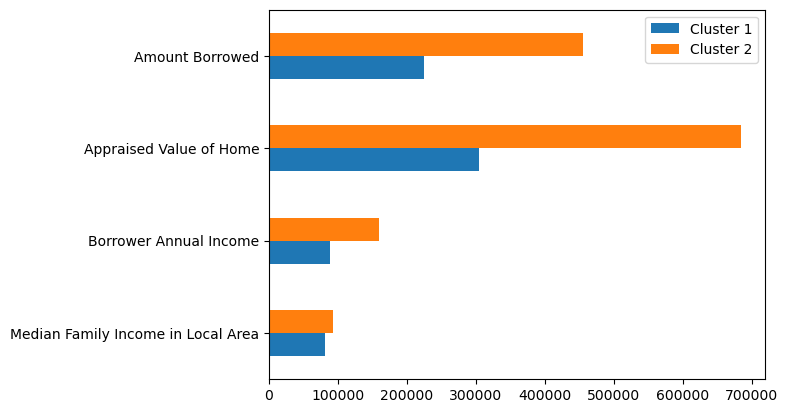

In [1846]:
joined_clusters1_and_2.loc[[index for index in joined_clusters1_and_2.index if index not in ['Borrower Income Ratio','Borrower Debt to Income Ratio','LTV Ratio','% Minority in Local Area','Length of Mortgage in Months', 'Mortgage Interest Rate']]
].plot(kind='barh')

<Axes: >

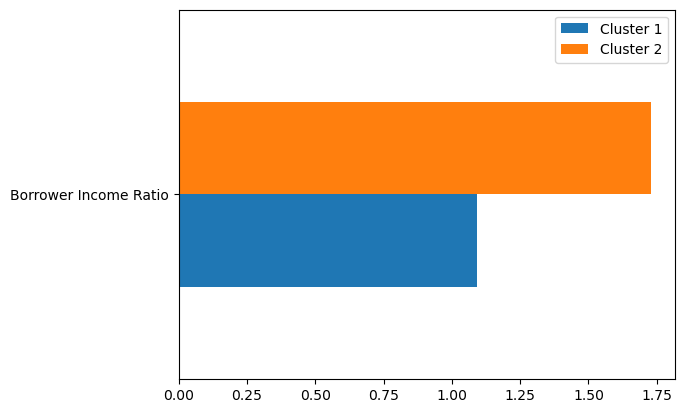

In [1845]:
joined_clusters1_and_2.loc[['Borrower Income Ratio']].plot(kind='barh')


In [1844]:
joined_clusters1_and_2.loc['Borrower Income Ratio']

Cluster 1    1.09245
Cluster 2    1.72870
Name: Borrower Income Ratio, dtype: float64

In [1841]:
joined_clusters1_and_2.loc[['Borrower Income Ratio']]

,Cluster 1,Cluster 2
Borrower Income Ratio,1.09245,1.7287


Figure(800x400)


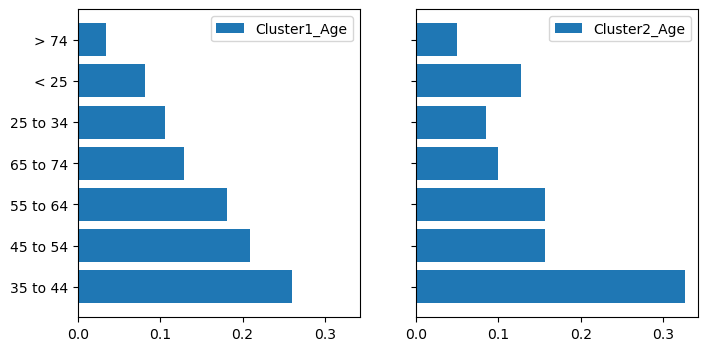

In [1931]:
figure,plot=myplot.subplots(1,2, figsize=(8,4), sharey=True, sharex=True)
print(figure)
plot[0].barh(cluster1_age_profiling.index, cluster1_age_profiling.values, label="Cluster1_Age")
plot[1].barh(cluster2_age_profiling.index, cluster2_age_profiling.values, label="Cluster2_Age")
plot[0].legend()
plot[1].legend()

myplot.show()

Figure(800x400)


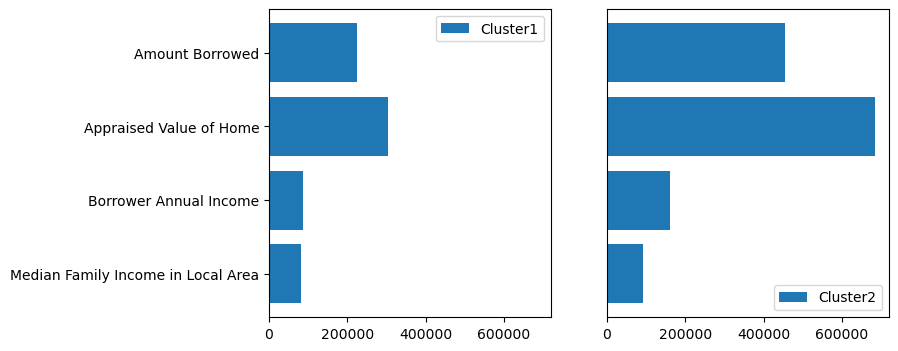

In [1978]:
demo=joined_clusters1_and_2.loc[[index for index in joined_clusters1_and_2.index if index not in ['Borrower Income Ratio','Borrower Debt to Income Ratio','LTV Ratio','% Minority in Local Area','Length of Mortgage in Months', 'Mortgage Interest Rate']]
]
figure,plot=myplot.subplots(1,2, figsize=(8,4), sharex=True)
print(figure)
plot[0].barh(demo.index, demo.values[:,0], label="Cluster1")
plot[1].barh(demo.index, demo.values[:,1], label="Cluster2")

plot[0].legend()

plot[1].legend()
plot[1].set_yticklabels([])
plot[1].yaxis.set_visible(False)
myplot.show()

                               Cluster 1  Cluster 2
Borrower Debt to Income Ratio      30.00       30.0
LTV Ratio                          76.92       68.0
Figure(800x400)


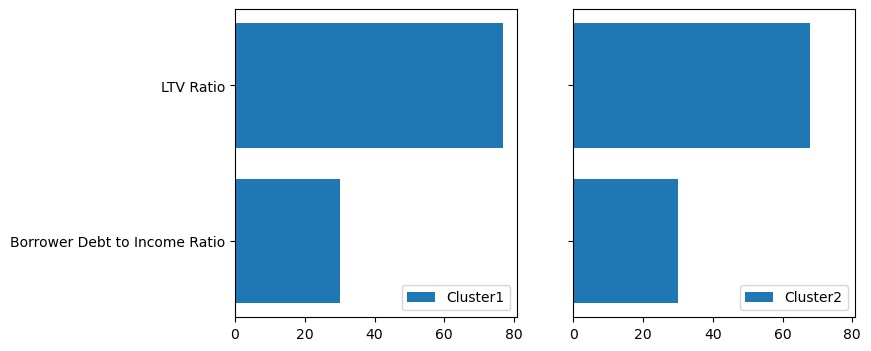

In [1935]:
borrower_leverage_and_affordability_metrics
print(borrower_leverage_and_affordability_metrics)
figure,plot=myplot.subplots(1,2, figsize=(8,4), sharey=True, sharex=True)
print(figure)
plot[0].barh(borrower_leverage_and_affordability_metrics.index, borrower_leverage_and_affordability_metrics.values[:,0], label="Cluster1")
plot[1].barh(borrower_leverage_and_affordability_metrics.index, borrower_leverage_and_affordability_metrics.values[:,1], label="Cluster2")

plot[0].legend()

plot[1].legend()

myplot.show()

Figure(800x400)
[0 1]


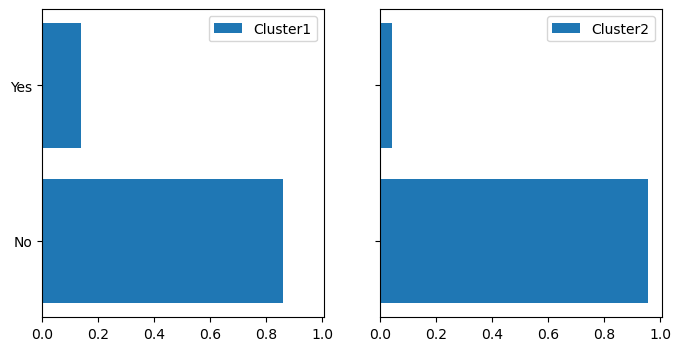

In [1976]:
figure,plot=myplot.subplots(1,2, figsize=(8,4), sharey=True, sharex=True)
print(figure)
ypos=np.arange(len(cluster1_buyer_profiling.index))
print(ypos)

plot[0].barh(ypos, cluster1_buyer_profiling.values, label="Cluster1")

plot[1].barh(ypos, cluster2_buyer_profiling.values, label="Cluster2")

plot[0].legend()

plot[1].legend()
plot[0].set_yticks(ypos)
plot[0].set_yticklabels(["No","Yes"])
myplot.show()




<Axes: ylabel='First Time Buyer? (1=Yes, 2=No)'>

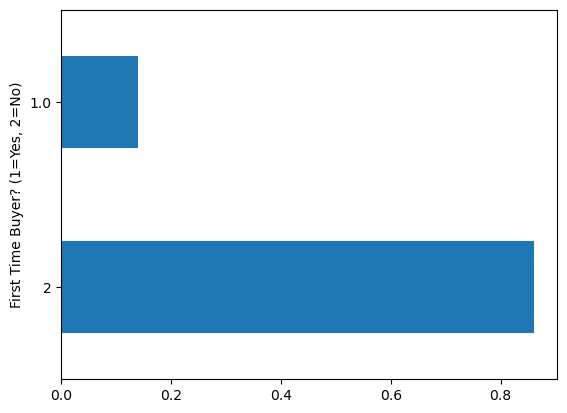

In [1977]:
cluster1_buyer_profiling.plot(kind='barh')

[0 1 2 3 4 5 6 7 8 9]


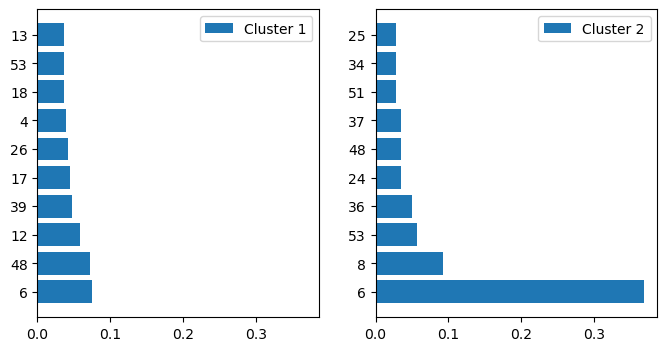

In [1963]:
figure,plot=myplot.subplots(1,2, figsize=(8,4), sharex=True)
ypos1=np.arange(len(cluster1_top_ten_area_code.index))
ypos2=np.arange(len(cluster2_top_ten_area_code.index))
labels1=cluster1_top_ten_area_code.index
labels2=cluster2_top_ten_area_code.index

print(ypos1)

plot[0].barh(ypos1, cluster1_top_ten_area_code.values, label="Cluster 1")
plot[1].barh(ypos2, cluster2_top_ten_area_code.values, label="Cluster 2")
plot[0].legend()

plot[1].legend()
plot[0].set_yticks(ypos1)
plot[0].set_yticklabels(labels1)
plot[1].set_yticks(ypos2)
plot[1].set_yticklabels(labels2)

myplot.show()

(array([401.,  85.,   9.,   3.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([  18000.,  172200.,  326400.,  480600.,  634800.,  789000.,
         943200., 1097400., 1251600., 1405800., 1560000.]),
 <BarContainer object of 10 artists>)

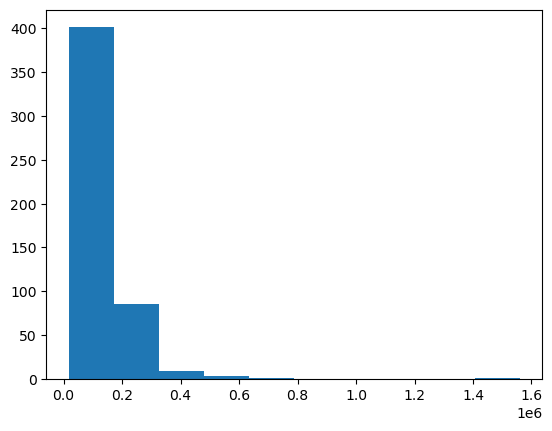

In [1984]:
myplot.hist(dataSet["Borrower Annual Income"])

In [1981]:
dataSet.to_csv("/Users/karanbudhaair/Downloads/commBankUnfilteredData.csv")

,Cluster 1,Cluster 2
% Minority in Local Area,17.99000,28.4300
Median Family Income in Local Area,80850.00000,92700.0000
Borrower Annual Income,88000.00000,160000.0000
Borrower Income Ratio,1.09245,1.7287
Borrower Debt to Income Ratio,30.00000,30.0000


In [1991]:
final_data_set=k_two_means_data_set2.drop("Cluster", axis=1).copy()


In [1992]:
final_data_set.head()

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Age of Borrower
0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,< 25
1,6,94.3698,83300,250000,3.0012,2,30,535000,505000,95,360,3.5,< 25
2,34,64.19,96500,64000,0.6632,2,43,375000,105000,22.3568,180.0,2.5,< 25
3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180.0,2.25,< 25
4,39,17.93,84600,109000,1.2884,1.0,30,405000,325000,80,180.0,2.87,< 25


In [1997]:
dti=final_data_set.groupby("Age of Borrower")["Borrower Debt to Income Ratio"]
dti.agg(["mean","median"])

,mean,median
Age of Borrower,,
25 to 34,28.02,30.0
35 to 44,30.143885,30.0
45 to 54,31.103093,30.0
55 to 64,29.977011,30.0
65 to 74,33.016667,36.0
< 25,29.12766,30.0
> 74,30.105263,30.0


In [1999]:
ltv=final_data_set.groupby("Age of Borrower")["LTV Ratio"]
ltv.agg(["mean","median"])

,mean,median
Age of Borrower,,
25 to 34,70.696136,72.08
35 to 44,67.701537,70.8
45 to 54,72.399386,78.34
55 to 64,71.864138,74.65
65 to 74,74.468947,78.56
< 25,70.929438,74.95
> 74,66.775621,73.46


(array([ 10.,  13.,  21.,  36.,  36.,  52.,  87., 140.,  35.,  69.]),
 array([22.3568 , 29.82112, 37.28544, 44.74976, 52.21408, 59.6784 ,
        67.14272, 74.60704, 82.07136, 89.53568, 97.     ]),
 <BarContainer object of 10 artists>)

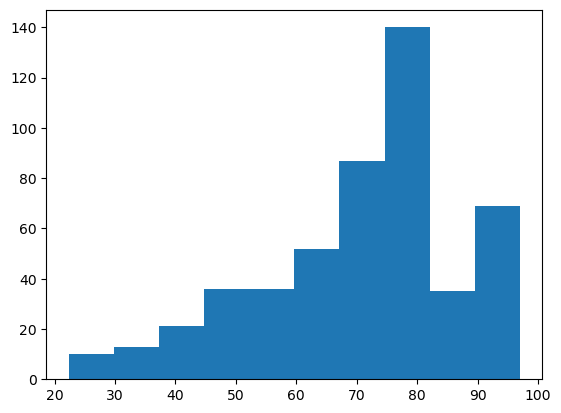

In [2000]:
myplot.hist(final_data_set["LTV Ratio"])

In [2003]:
data_for_clustering[data_for_clustering["LTV Ratio"]<=60].count()

0
Borrower ID Number                    126
Wide Area Location Code               126
% Minority in Local Area              126
Median Family Income in Local Area    126
Borrower Annual Income                126
Borrower Income Ratio                 126
First Time Buyer? (1=Yes, 2=No)       126
Borrower Debt to Income Ratio         126
Appraised Value of Home               126
Amount Borrowed                       126
LTV Ratio                             126
Length of Mortgage in Months          126
Mortgage Interest Rate                126
cluster                               126
dtype: int64

<BarContainer object of 4 artists>

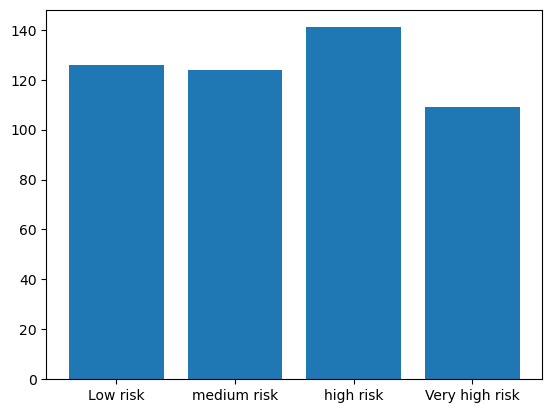

In [2008]:
myplot.bar(["Low risk", "medium risk", "high risk", "Very high risk"],[126,124,141,109])

Text(0.5, 1.0, 'Home Buyers')

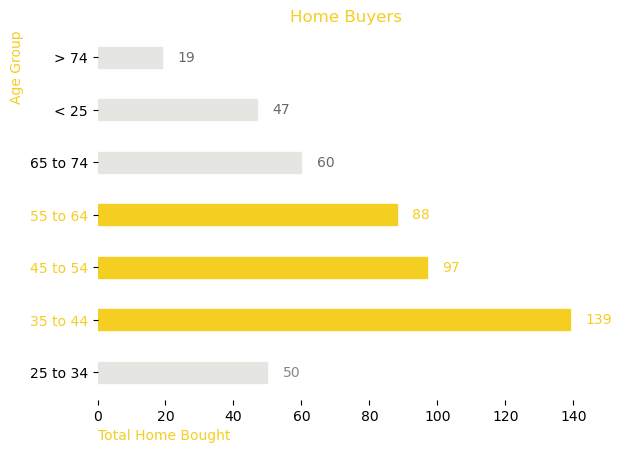

In [2150]:
fig, axes=myplot.subplots()
age_group=dataSet.groupby(by="Age of Borrower")["First Time Buyer? (1=Yes, 2=No)"].count()
bar_objects=myplot.barh(age_group.index,age_group.values, height=0.4) 


all_ytickslabels=axes.get_yticklabels()
color_item_index=[1,2,3]
for item in color_item_index:
    all_ytickslabels[item].set_color("#f5ce22")
    bar_objects[item].set_color("#f5ce22")
    
# putting information in backgroud
shadow_bars=[0,4,5,6]
for item in shadow_bars:
   
    bar_objects[item].set_color("#e5e6e1")
    
    


selected_bars = [0,1,2, 3,4,5,6]
label_colors = ["#878782","#f5ce22","#f5ce22","#f5ce22","#696963","#696963","#696963"]

for idx, bar_idx in enumerate(selected_bars):
    bar = bar_objects[bar_idx]
    axes.text(bar.get_width() + 4.5, bar.get_y() + bar.get_height()/2,
            f"{bar.get_width()}",
            color=label_colors[idx],
            va='center')
axes.set_ylabel("Age Group",loc="top", color="#f5ce22" )
axes.set_xlabel("Total Home Bought",loc='left', color="#f5ce22")

#Adjusting the y_axis line
axes.spines["left"].set_visible(False)
axes.spines["right"].set_visible(False)
axes.spines["top"].set_visible(False)
axes.spines["bottom"].set_visible(False)
axes.set_title("Home Buyers", color="#f5ce22")


In [2135]:
age_group.sum()

944

In [2137]:
dataSet["First Time Buyer? (1=Yes, 2=No)"]

500

In [2142]:
age_=dataSet.groupby(by="Age of Borrower")["First Time Buyer? (1=Yes, 2=No)"].count().sum()
age_

500